#**IMPORTING LIBERIES**

In [551]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [552]:
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize': (8,6)}, style='ticks', context='notebook')

In [553]:
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.impute import SimpleImputer


import seaborn as sns
sns.set(rc={'figure.figsize': (8,6)}, style='ticks', context='notebook')

class DataProcess:
          def __init__(self,df):
                 self.df = df
          def Numerical(df):
                 return df.select_dtypes(include = ['int64' , 'float64'])  
          def Categorical(df):
                  return df.select_dtypes(include = ['object'])                                         
          def Missing(df):                                      
                  return sns.heatmap(df.isnull(), cbar = False, cmap='viridis')                                     
          def df_joiner(df1, df2):
                 return pd.concat(df1, df2)                                  
          def get_month(x):
                return (x.month)                                 
          def get_year(x):
                return (x.year)                                
          def get_day(x):
                return (x.day)                                 
          def correlation_map(df):
                f, ax = plt.subplots(figsize= (15,10))
                return sns.heatmap(data=df.corr(), annot = True);  
               


#**LOADING THE DATASET AND MOUNTING MY DRIVE**


In [554]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [555]:
file='/content/drive/My Drive/projects/adverts.csv'

In [556]:
data_df =pd.read_csv(file) 

#1. **Data Understandiong and Exploration (EDA)**

Data understanding and exploration refers to the process of reviewing and analyzing a dataset in order to gain a deeper understanding of the data, its characteristics, and any patterns or relationships that may exist within it. This step is crucial in the data science process as it helps to identify any potential issues or biases in the data, and inform the decisions made in later steps such as feature selection and modeling. Techniques used in data understanding and exploration include descriptive statistics, visualization, and data cleaning.





## 1.1 Meaning and Type of Features / Analysis of Distributions


Let quickly visualise our dataframe called data_df

Let visualize the first 5 rows of the *Dataset*.

In [557]:
data_df.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


Let visualize the last 5 rows of the *Dataset*.

In [558]:
 data_df.tail() 

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
402000,202010315652942,5179.0,69,Grey,Peugeot,208,USED,2019.0,10595,Hatchback,False,Petrol
402001,202010315657341,110000.0,59,Red,Peugeot,107,USED,2009.0,2000,Hatchback,False,Petrol
402002,202010315659271,52760.0,62,White,Nissan,Qashqai,USED,2012.0,7250,SUV,False,Petrol
402003,202011015662436,10250.0,65,Red,Abarth,595,USED,2015.0,11490,Hatchback,False,Petrol
402004,201512149444029,14000.0,14,Silver,Audi,A4 Avant,USED,2014.0,20520,Estate,False,Diesel


Let restructure our dataframe by passing the above code 
so that the price can be at the end
If in future if i needed to slice the dataframe it will be easy to slice my target which is the price 


In [559]:
data_df = data_df[['public_reference', 'mileage', 'reg_code', 'standard_colour',
       'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'body_type', 'crossover_car_and_van',
       'fuel_type' , 'price']]

In [560]:
data_df.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,body_type,crossover_car_and_van,fuel_type,price
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,SUV,False,Petrol Plug-in Hybrid,73970
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,Saloon,False,Diesel,7000
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,SUV,False,Petrol,14000
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,Hatchback,False,Diesel,7995
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,SUV,False,Diesel,26995


From above we can see that the price is now at the end

In [561]:
data_df.shape

(402005, 12)

 Our dataframe data_df displayed the structure of the dataset showing how many columns and how many rows in the dataframe. My data_df have 402005 rows (Observations) with 12 columns (features)
 

In [562]:
data_df.describe()

,public_reference,mileage,year_of_registration,price
count,4.020050e+05,401878.000000,368694.000000,4.020050e+05
mean,2.020071e+14,37743.595656,2015.006206,1.734197e+04
std,1.691662e+10,34831.724018,7.962667,4.643746e+04
min,2.013072e+14,0.000000,999.000000,1.200000e+02
25%,2.020090e+14,10481.000000,2013.000000,7.495000e+03
50%,2.020093e+14,28629.500000,2016.000000,1.260000e+04
75%,2.020102e+14,56875.750000,2018.000000,2.000000e+04
max,2.020110e+14,999999.000000,2020.000000,9.999999e+06


The output of the data_df.describe() function is a table that provides some basic statistical information about the numerical columns of the dataframe data_df. The table includes the count, mean, standard deviation, minimum, 25th percentile, 50th percentile (median), 75th percentile and maximum values for each of the columns. where the features include "public_reference","mileage","year_of_registration" and "price".

The price count is 402005 without missing values, average price is 17341.97 pounds, lowest price of 120 and highest price to be 9,999,999 pounds which maybe beacause of the outliers and noise while the data_df as a range of mileage between 0 - 9999999 Km


### 1.1.1 Meaning and Type of Features

Let display both dependent and nondependent of the columns of our dataset (features)

In [563]:
#display all the dependent and non dependent features of the data_df
data_df.keys()

Index(['public_reference', 'mileage', 'reg_code', 'standard_colour',
       'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'body_type', 'crossover_car_and_van',
       'fuel_type', 'price'],
      dtype='object')

Our dataset shows consist of the following features public_reference, mileage, reg_code, standard_colour, standard_make,standard_model ,vehicle_condition,
       year_of_registration, body_type,crossover_car_and_van,
       fuel_type and price

In [564]:
data_df.standard_make.unique()

array(['Volvo', 'Jaguar', 'SKODA', 'Vauxhall', 'Land Rover', 'Audi',
       'Mercedes-Benz', 'Volkswagen', 'Peugeot', 'SEAT', 'MINI', 'BMW',
       'Nissan', 'Mitsubishi', 'Ferrari', 'Citroen', 'Toyota', 'Kia',
       'Renault', 'Fiat', 'Honda', 'Bentley', 'DS AUTOMOBILES', 'Hyundai',
       'Aston Martin', 'McLaren', 'Smart', 'Alfa Romeo', 'Porsche',
       'Abarth', 'Mazda', 'Suzuki', 'MG', 'Dacia', 'Subaru', 'SsangYong',
       'Maserati', 'Saab', 'Rolls-Royce', 'Lexus', 'Jeep', 'Panther',
       'Chevrolet', 'Lamborghini', 'Daihatsu', 'Dodge', 'Isuzu', 'Lotus',
       'Tesla', 'TVR', 'GMC', 'Rover', 'Cadillac', 'Infiniti', 'Alpine',
       'Chrysler', 'Triumph', 'Morgan', 'Dax',
       'London Taxis International', 'Daimler', 'CUPRA', 'Perodua',
       'Lincoln', 'Bugatti', 'Great Wall', 'Replica', 'Opel', 'AC',
       'Proton', 'Lancia', 'Austin', 'Morris', 'Westfield', 'Maybach',
       'Corvette', 'Tiger', 'LEVC', 'Iveco', 'Caterham', 'Hummer',
       'Carbodies', 'Jensen', 'Int

The above function returns an array of object values of all the uniqque values in standard_make. where the values in this array represent different car makes present in the dataframe named data_df.

In [565]:
data_df.fuel_type.unique()

array(['Petrol Plug-in Hybrid', 'Diesel', 'Petrol', 'Diesel Hybrid',
       'Petrol Hybrid', 'Electric', 'Diesel Plug-in Hybrid', nan,
       'Bi Fuel', 'Natural Gas'], dtype=object)

The above function returns an array of object values of all the uniqque values in fuel_type. where the values in this array represent different car makes present in the dataframe named data_df.

In [566]:
data_df.reg_code.unique()

array([nan, '61', '17', '16', '64', '13', '08', '19', '60', '69', '66',
       '12', '18', '65', '09', 'B', '10', '14', '03', '67', '63', '15',
       '68', '56', '20', '70', '62', '11', '05', '59', '58', 'W', '02',
       '57', '06', '52', '53', '04', 'J', '07', '55', '51', 'X', 'D', 'S',
       'Y', '54', 'H', 'K', 'E', 'L', 'V', 'M', 'G', 'T', 'N', 'P', 'A',
       'F', 'R', 'C', '94', '85', 'CA', 'm', 'FW', '723xuu', '95', 's',
       '38', 'k', '37', 'p'], dtype=object)

The above function returns an array of object values of all the uniqque values in reg_code. where the values in this array represent different car makes present in the dataframe named data_df. we can see some values having number and alphabet e.g 723xuu whinch makes the reg_code falls under categorical features 

In [567]:
data_df.vehicle_condition.unique()

array(['NEW', 'USED'], dtype=object)

The above function returns an array of object values of all the uniqque values in vehicle_condition. where the values in this array represent different car makes present in the dataframe named data_df.

Let understand the structure of data_df 

In [568]:
# geting the data types of our features
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   body_type              401168 non-null  object 
 9   crossover_car_and_van  402005 non-null  bool   
 10  fuel_type              401404 non-null  object 
 11  price                  402005 non-null  int64  
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


from the data summary we have datatypes as foloow were crossover_car_and_van is only the boolen (bool(1))
 year_of_registration and  mileage  are in fload (float64(2))
public_reference and price are in integer (int64(2)) while the other features are in object (object(7))
with some features having missing values which we later know the exact value of missing data. 

Let compose a function to avoid repeatation of code by using the python object oriented concept using class named DataProcess. Using contructor: initializing the dataframe and declaring another functions called numerical and categorical features respectively, by displaying Numerical and categorical features of the dataset seperatly 


In [569]:
#Displaying only the numerical features 
DataProcess.Numerical(data_df)


,public_reference,mileage,year_of_registration,price
0,202006039777689,0.0,NaN,73970
1,202007020778260,108230.0,2011.0,7000
2,202007020778474,7800.0,2017.0,14000
3,202007080986776,45000.0,2016.0,7995
4,202007161321269,64000.0,2015.0,26995
...,...,...,...,...
402000,202010315652942,5179.0,2019.0,10595
402001,202010315657341,110000.0,2009.0,2000
402002,202010315659271,52760.0,2012.0,7250
402003,202011015662436,10250.0,2015.0,11490


In [570]:
#Displaying only the categorical feautures from the datafram data_df
DataProcess.Categorical(data_df)

,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,body_type,fuel_type
0,NaN,Grey,Volvo,XC90,NEW,SUV,Petrol Plug-in Hybrid
1,61,Blue,Jaguar,XF,USED,Saloon,Diesel
2,17,Grey,SKODA,Yeti,USED,SUV,Petrol
3,16,Brown,Vauxhall,Mokka,USED,Hatchback,Diesel
4,64,Grey,Land Rover,Range Rover Sport,USED,SUV,Diesel
...,...,...,...,...,...,...,...
402000,69,Grey,Peugeot,208,USED,Hatchback,Petrol
402001,59,Red,Peugeot,107,USED,Hatchback,Petrol
402002,62,White,Nissan,Qashqai,USED,SUV,Petrol
402003,65,Red,Abarth,595,USED,Hatchback,Petrol


### 1.1.2 Analysis of Distributions

In [571]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   body_type              401168 non-null  object 
 9   crossover_car_and_van  402005 non-null  bool   
 10  fuel_type              401404 non-null  object 
 11  price                  402005 non-null  int64  
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


The info() method provides a summary of our dataframe data_df which includes   data_df has 402005 rows and 12 columns, with some of the columns having missing values. The crossover_car_and_van column is of boolean type, the year_of_registration and mileage are of float type, public_reference and price are of integer type, and the remaining columns are object type.


In [572]:
#all the dependent and non dependent feature of data_df
data_df.columns

Index(['public_reference', 'mileage', 'reg_code', 'standard_colour',
       'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'body_type', 'crossover_car_and_van',
       'fuel_type', 'price'],
      dtype='object')

Let display few categorical statistics measure of our data_df

In [573]:
cat_features = data_df.select_dtypes(include=object)
cat_features.describe()

,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,body_type,fuel_type
count,370148,396627,402005,402005,402005,401168,401404
unique,72,22,110,1168,2,16,9
top,17,Black,BMW,Golf,USED,Hatchback,Petrol
freq,36738,86287,37376,11583,370756,167315,216929


The statiscs measure of the categorical features 
it display only the counts of the features excluding the null values, the top came from reg_code with 22 black color car 110 different make of cars with BMW been the top and model Golf. also the higest number of occurence of is used car with Hatchback body type with 9 types of petrol. 
370756 where used cars.
unique implies to avoid repetaion 


In [574]:
data_df['price'].describe().round(2)

count     402005.00
mean       17341.97
std        46437.46
min          120.00
25%         7495.00
50%        12600.00
75%        20000.00
max      9999999.00
Name: price, dtype: float64

The average car price is 17341.97 and the cheapest car cost 120. the Most expensive car cost 9,999,999 but in the Uk the most expensive price of the car in 2022 was £7,762,500 (google) due to this marging our dataset may have outliers or irrelivant data

In [575]:
data_df['mileage'].describe().round(2)

count    401878.00
mean      37743.60
std       34831.72
min           0.00
25%       10481.00
50%       28629.50
75%       56875.75
max      999999.00
Name: mileage, dtype: float64

The average speed of mileage in the data set have 37743.60  minimum mileage of 0km ,with the higest mileage car of 999999. 50% of car have mileage between 0 and 28629.50, 25% between 0 and 10481 and 75% between 0 and 56875.75. 

### 1.2 Identification / Commenting on Missing Values
	

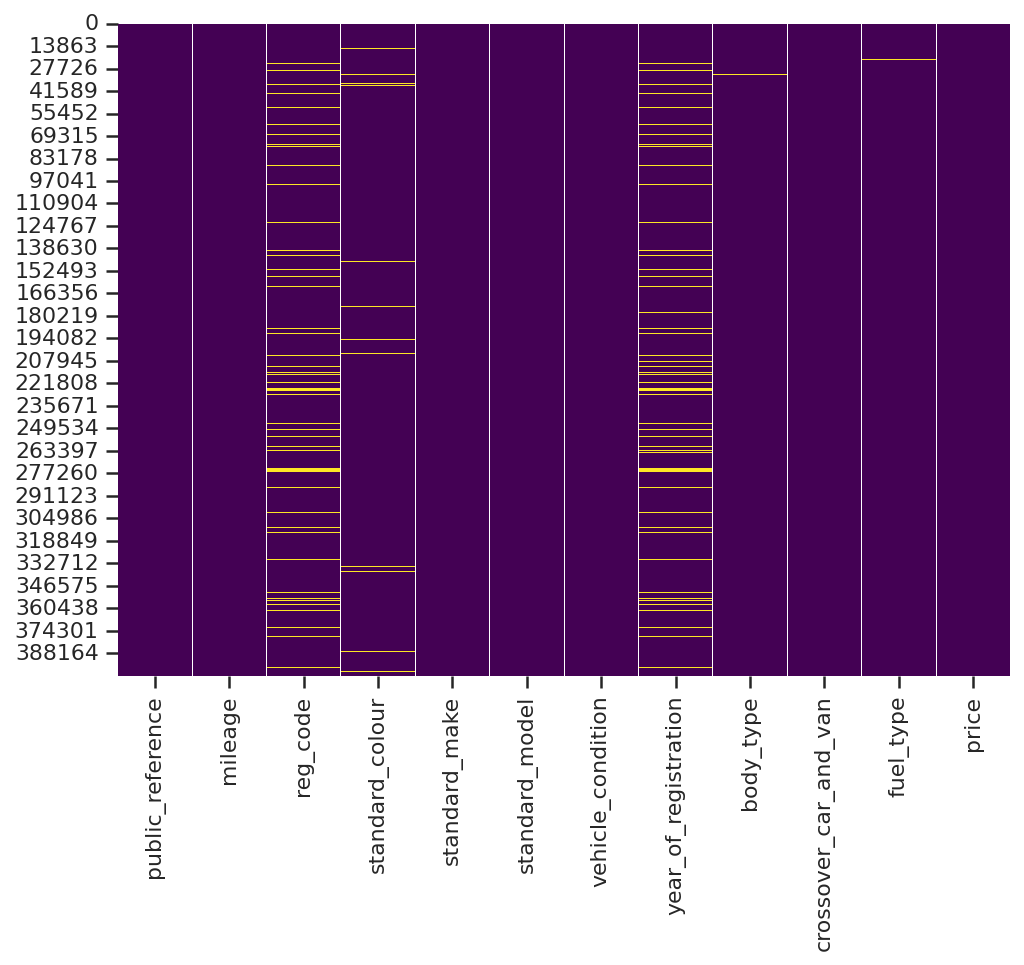

In [576]:
DataProcess.Missing(data_df)

The DataProcess was used to drwan heat map for Missing values   
which shows features that have missing data with a stiches yellow color. the more the shades the higher the value of the missing values while those without it implies no missing values on that columns
To call the function, we use DataProcess.Missing (df) 

In [577]:
data_df.isna().sum()

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
body_type                  837
crossover_car_and_van        0
fuel_type                  601
price                        0
dtype: int64

data_df.isna().sum() method.

The column "public_reference" has no missing values, while the "mileage" column has 127 missing values. The "reg_code" column has 31857 missing values, "standard_colour" column has 5378 missing values, while "year_of_registration" column has 33311 missing values. The "body_type" column has 837 missing values, "fuel_type" column has 601 missing values.

please note that having missing values in some features, could affect the performance of the our model if not handled properly. we have different ways of dealing with missimg values which will later make the dicission 

One way to handle missing values is to remove the rows with missing values, but this can lead to loss of information. Another way is to fill in the missing values with a default value, such as the mean or median of the column, or using the value of the previous or next row.

It's important to make a decision on how to handle the missing data based on the percentage of missing data, the column and the importance of the data for the problem being solved.

data_df.isna().any() display the missing values in boolen.



# **2. DATA PROCESSING**



Let count the number of records for all the combination of unique values for the categorical features. 
using value_counts() is for frequency distributions -which is suitable for categorical features to know how uniformly they are distributed.
We have many categorical features in the dataframe and if i remove the lesser counts  as an outlier, it may affect the prediction. 
 Also dealing with Numerical features by using boxplots to identify how the data is been skeewed
 

In [578]:
#visualizing price feature
data_df['price'].apply(np.log10).head()

0    4.869056
1    3.845098
2    4.146128
3    3.902818
4    4.431283
Name: price, dtype: float64

In [579]:
data_df['price'].value_counts()

8995     2432
7995     2377
6995     2369
9995     2340
5995     2249
         ... 
16253       1
44150       1
50340       1
76989       1
58987       1
Name: price, Length: 30578, dtype: int64

This code is using the Seaborn library to create a figure with a specified size, and then plotting a distribution of the "price" column in a DataFrame called "data_df" using a logarithmic scale on the y-axis. The distplot function of Seaborn is used to plot the distribution of a univariate set of observations, which in this case is the "price" column of the DataFrame. The log10 function from the numpy library is applied to the "price" column before it is plotted, which is why you see the "apply(np.log10)" part in the code. The purpose of taking the logarithm of the data is often to transform the data so that it better fits a normal distribution which allows for more accurate analysis and modeling.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


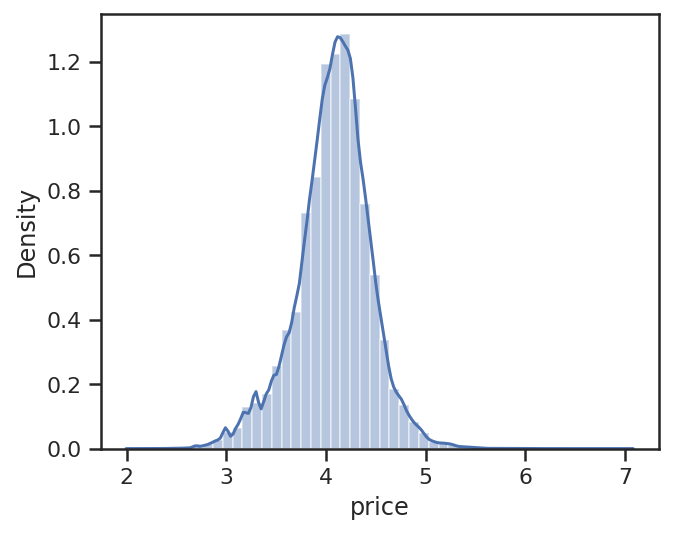

In [580]:
plt.figure(figsize=(5, 4))
sns.distplot(data_df['price'].apply(np.log10));


This creat a box plot instead of a distribution plot. 
 using box plot which is a standardized way of displaying the distribution of data based on five number summary, which are:

The minimum value
The first quartile (Q1), also known as the lower quartile, which is the value that separates the lowest 25% of the data from the rest
The median, which is the value that separates the lowest 50% of the data from the highest 50%
The third quartile (Q3), also known as the upper quartile, which is the value that separates the highest 25% of the data from the rest
The maximum value

here the data is transformed by applying log10 function to the 'price' column, which is a better way of  visualizing the data if it has a large range of values and this transformation helps to better identify outliers or skewed data.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


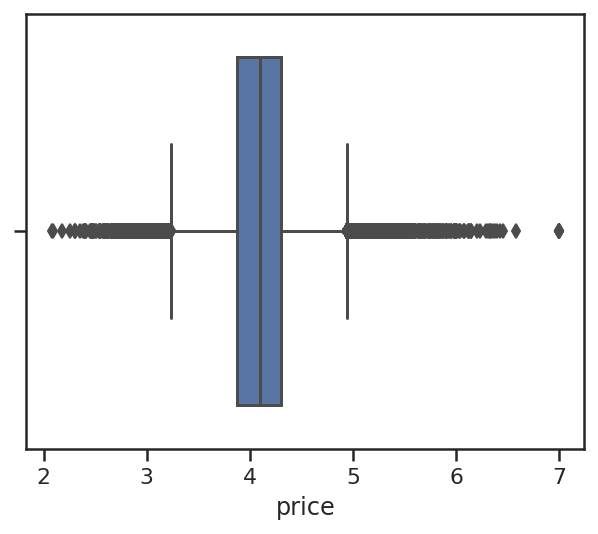

In [581]:
plt.figure(figsize=(5, 4))
sns.boxplot(data_df['price'].apply(np.log10));


The "price" box plot shows that variable are skewed towards the upper and lower quartile with noise. upper quartile from 5 upward and lower quatile around 4.7 bellow, we need to clean the data to avoid the impact of outliers on the data and ensure that the model or analysis is not affected by these extreme. 

In [582]:
data_df['mileage'].value_counts()

0.0        16207
10.0       12873
5.0         2434
60000.0     1609
50000.0     1580
           ...  
53660.0        1
72993.0        1
74437.0        1
66881.0        1
53460.0        1
Name: mileage, Length: 80634, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


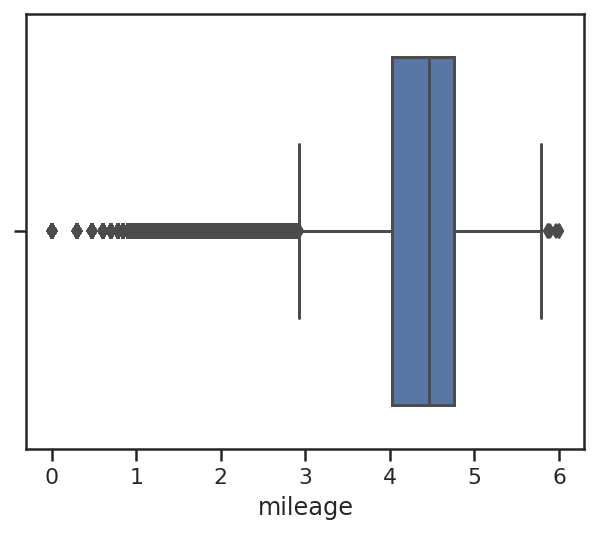

In [583]:
plt.figure(figsize=(5, 4))
sns.boxplot(data_df['mileage'].apply(np.log10));


The "mileage" box plot shows that variable are skewed towards the lower quartile with noise. just little on the upper quartile, we need to clean the data to avoid the impact of outliers on the data and ensure that the model or analysis is not affected by these extreme values

Let do for nominal features (categorical data) using barplots and histplots

In [584]:
from locale import normalize
data_df['standard_make'].value_counts(normalize=False)

BMW               37376
Audi              35280
Volkswagen        34246
Vauxhall          33700
Mercedes-Benz     31917
                  ...  
Bristol               1
Wolseley              1
Pagani                1
International         1
Custom Vehicle        1
Name: standard_make, Length: 110, dtype: int64

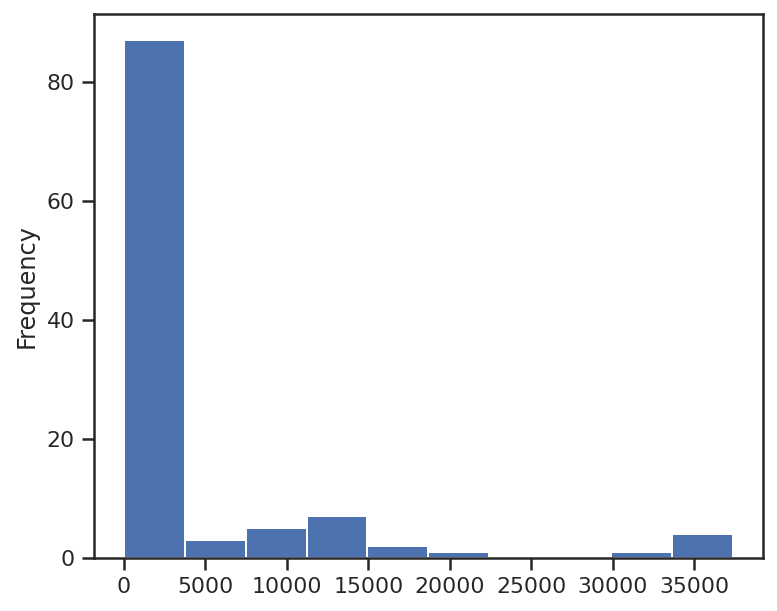

In [585]:
figure  = plt.figure(figsize =(6,5))
data_df['standard_make'].value_counts().plot.hist(); 

The above graphs shows that there is high frequency of some particular standard_make of car. like BMW  having the higest occurnce of 37376 been sold followed by  Audi 35280, Volkswagen 34246 Vauxhall 33700 and Mercedes-Benz 31917in the "standard_make" variable with  frequency of about 95% that is higher than the others make This could be the  impact of outliers on the data whivh we need to deal with to ensure that the model or analysis is not affected by these extreme values.

In [586]:
data_df['body_type'].value_counts()

Hatchback          167315
SUV                115872
Saloon              36641
Estate              24692
Coupe               23258
Convertible         16038
MPV                 16026
Pickup                620
Combi Van             214
Limousine             159
Minibus               149
Camper                 77
Panel Van              61
Window Van             41
Chassis Cab             3
Car Derived Van         2
Name: body_type, dtype: int64

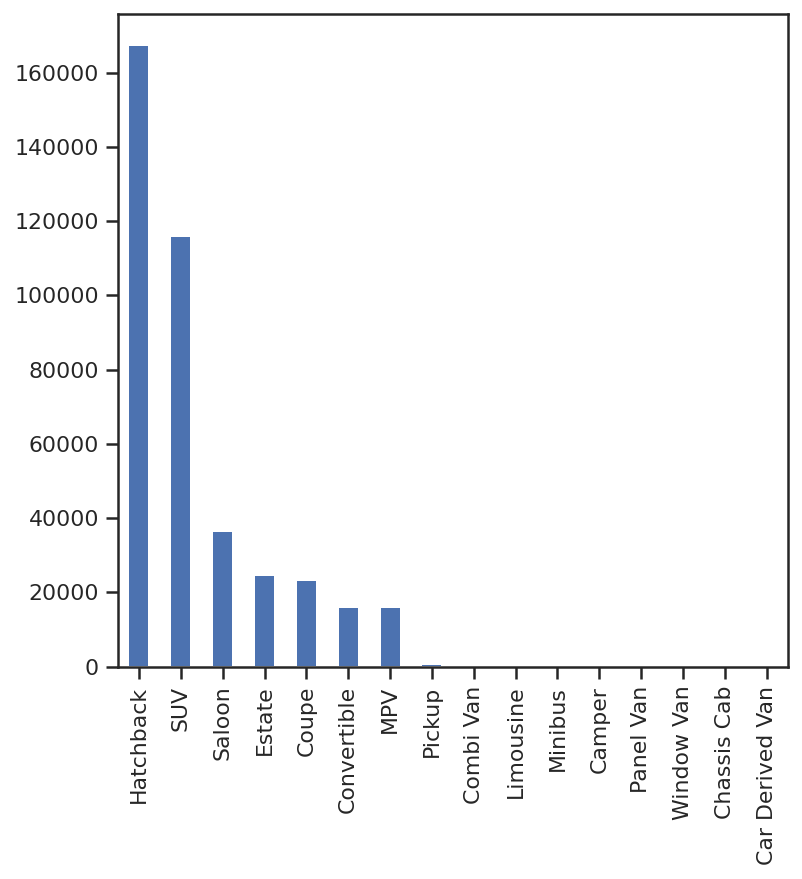

In [587]:
figure  = plt.figure(figsize =(6,6))
data_df['body_type'].value_counts().plot.bar();

the plotbar shows that Hatchback has the higest raye of 167315 follow by SUV  115872  till Pickup body type of car that the fequency is insignificant but that those not mean they wont have effect on our prediction therfore we need to be extra careful in dealing with them.

In [588]:
data_df["reg_code"].value_counts()

17        36738
67        32230
66        25227
69        23825
18        21613
          ...  
723xuu        1
FW            1
m             1
85            1
p             1
Name: reg_code, Length: 72, dtype: int64

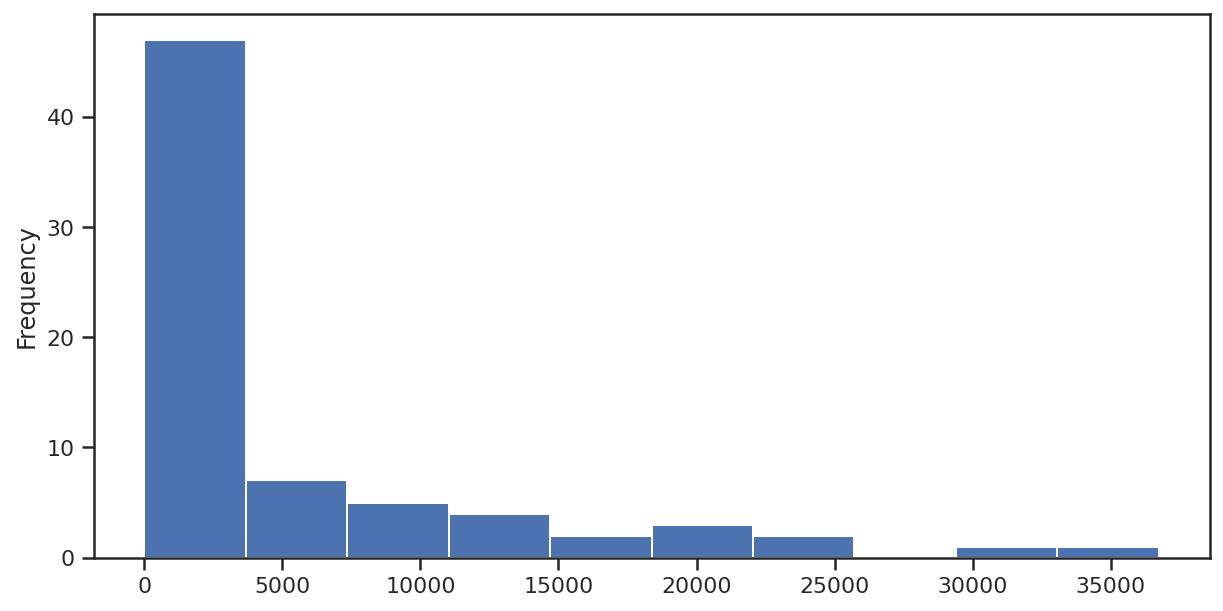

In [589]:
figure  = plt.figure(figsize =(10,5))
data_df['reg_code'].value_counts().plot.hist();

17 reg_code have a very hidg frequency of 36738 with some reg_code having verylow frequences which can be seen at outliers

In [590]:
data_df["vehicle_condition"].value_counts()

USED    370756
NEW      31249
Name: vehicle_condition, dtype: int64

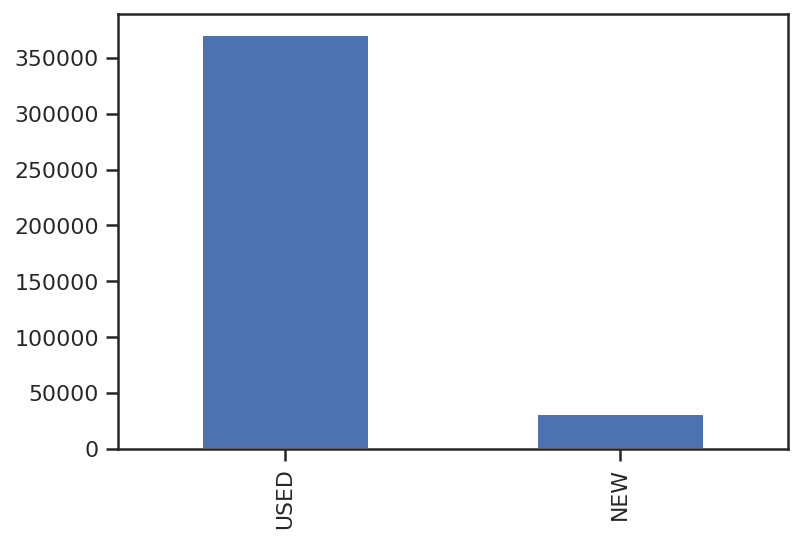

In [591]:
figure  = plt.figure(figsize =(6,4))
data_df['vehicle_condition'].value_counts().plot.bar();

As you can see from above graph most of the car sold are used cars with 370756 of occurrence while others are new cars

In [592]:
null_columns=pd.DataFrame({'Columns':data_df.isna().sum().index,'No. Null values':data_df.isna().sum().values,'Percentage':(data_df.isna().sum().values/data_df.shape[0]) * 100})
null_columns

,Columns,No. Null values,Percentage
0,public_reference,0,0.000000
1,mileage,127,0.031592
2,reg_code,31857,7.924528
3,standard_colour,5378,1.337794
4,standard_make,0,0.000000
5,standard_model,0,0.000000
6,vehicle_condition,0,0.000000
7,year_of_registration,33311,8.286215
8,body_type,837,0.208206
9,crossover_car_and_van,0,0.000000


##2.1 Dealing with missing values / Dealing with outliers andv noise
		

###2.1.1 Dealing with missing values


**Dealing with missing value Mileage** query was passed by make_model and data_age because a car may have similar mileage with different car of the same make and model with same registration year


In [593]:
data_df['mileage']=data_df.groupby(['standard_make','year_of_registration'])['mileage'].apply(lambda x:x.fillna(x.mean()))

In [594]:
data_df['mileage'].mean()

40989.942567048674

In [595]:
data_df['mileage']=data_df.groupby(['standard_make','fuel_type'])['mileage'].apply(lambda x:x.fillna(x.mode()))

In [596]:
data_df['mileage'].fillna(data_df['mileage'].mean(), inplace=True)
data_df["mileage"].isna().sum()

0

In [597]:
data_df['reg_code'].fillna(data_df['reg_code'].mode().iloc[0], inplace=True)
data_df['standard_colour'].fillna(data_df['standard_colour'].mode().iloc[0], inplace=True)
data_df['body_type'].fillna(data_df['body_type'].mode().iloc[0], inplace=True)
data_df['fuel_type'].fillna(data_df['fuel_type'].mode().iloc[0], inplace=True)
data_df['year_of_registration'].fillna(data_df['year_of_registration'].mode().iloc[0], inplace=True)

In [598]:
data_df.isna().sum()

public_reference         0
mileage                  0
reg_code                 0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
body_type                0
crossover_car_and_van    0
fuel_type                0
price                    0
dtype: int64

###2.1.2 Dealing with missing outliers and noise

The steps used to remove outliers in this section is:
* Use boxplot to display the feature
* Use the insight from the boxplot to remove the outlier 

In [599]:
data_df['price']=data_df['price'].clip(lower=data_df['price'].quantile(0.1), upper=data_df['price'].quantile(0.9))

In [600]:
data_df.isna().sum()

public_reference         0
mileage                  0
reg_code                 0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
body_type                0
crossover_car_and_van    0
fuel_type                0
price                    0
dtype: int64

From above all the missing values have been taking care off, let now deal with the outliiers and noise below.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


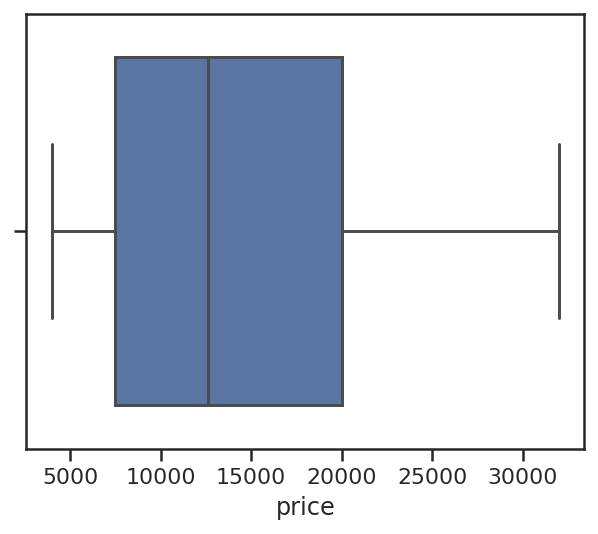

In [601]:
plt.figure(figsize=(5, 4))
sns.boxplot(data_df['price'])


The above box plot shows the price feature of our data without the outliers and noise. It is noticeable that the average price is 14800, minimum of about 4,000, maximium price of 32,000, 75% ranges between 4000 and 20,000, 50% between 4000 and 12,600 and 25% between 4000 and 7500. 

In [602]:
data_df['price'].max()

31990.0

In [603]:
data_df['mileage']=data_df['mileage'].clip(lower=data_df['mileage'].quantile(0.05), upper=data_df['mileage'].quantile(0.95))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


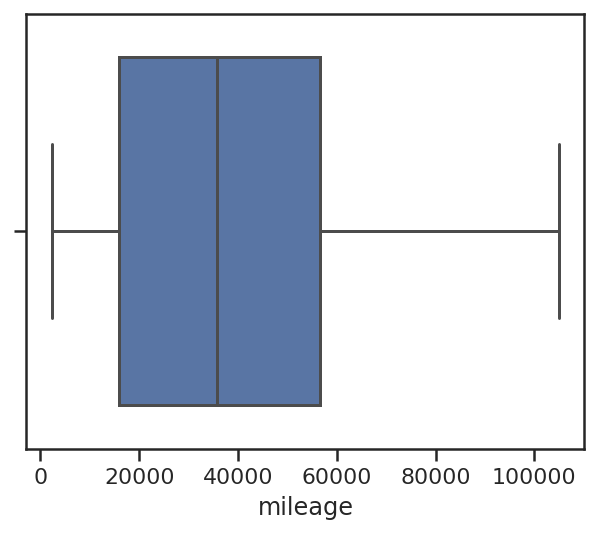

In [604]:
plt.figure(figsize=(5, 4))
sns.boxplot(data_df['mileage'])


for mileage we have 

In [605]:
data_df['year_of_registration']=data_df['year_of_registration'].clip(lower=data_df['year_of_registration'].quantile(0.1), upper=data_df['year_of_registration'].quantile(0.9))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


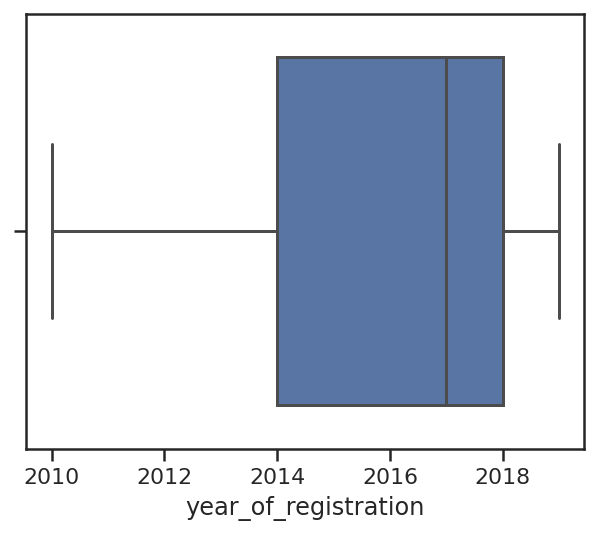

In [606]:
plt.figure(figsize=(5, 4))
sns.boxplot(data_df['year_of_registration'])


Outliers have been removes along with noise and now our data for futher analysis

Note:Removing outliers and noise can help us ensure that the results are more accurate and representative of the underlying patterns in the data. Outliers, in particular, can skew the results and lead to false conclusions. Noise can also make it more difficult to identify patterns and relationships in the data. By removing these elements, it is possible to obtain a clearer and more reliable picture of the underlying trends and relationships in the data.
Because Outliers and noise can have a significant impact on the results of data analysis and modeling. 




Feature engineering is the process of transforming raw data into a format that can be easily understood and used by the model. such as creating new features by combining existing ones, normalizing data, and handling missing or outlier values. The goal of feature engineering is to create a set of relevant and informative features that can improve the performance of a machine learning model. It is a crucial step in the machine learning pipeline as the quality of the features can have a significant impact on the performance of the model.

##2.2 Feature Enginearing, Data Transformation
		

### **2.2.1 Feature Engineering**
		

let us make a  copy of our dataframe so that we do not make changes to the original dataset.




In [607]:
trans_data_df=data_df.copy()

we can get the age of our vehicle from the year of registration. ref (https://en.wikipedia.org/wiki/Vehicle_registration_plates_of_the_United_Kingdom) 

we generate a new feature for the age of our vehicle (data_age). by using our age function created bellow

In [608]:
from datetime import date
def age(year_of_registration):
    current_year = date.today().year
    age = current_year -  year_of_registration
    return age

In [609]:
trans_data_df['data_age']= age(trans_data_df['year_of_registration'])

Since the standard_make and standard_model provide similar information. 
It will make more meaning by combining  them into one feature name (make_model)
by usinf the code bellow

In [610]:
trans_data_df['make_model'] = trans_data_df['standard_make'].astype(str) + '_' + trans_data_df['standard_model']


Let see if the features created as been added to the dataset


In [611]:
trans_data_df.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,body_type,crossover_car_and_van,fuel_type,price,data_age,make_model
0,202006039777689,2310.0,17,Grey,Volvo,XC90,NEW,2017.0,SUV,False,Petrol Plug-in Hybrid,31990.0,6.0,Volvo_XC90
1,202007020778260,105000.0,61,Blue,Jaguar,XF,USED,2011.0,Saloon,False,Diesel,7000.0,12.0,Jaguar_XF
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,SUV,False,Petrol,14000.0,6.0,SKODA_Yeti
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,Hatchback,False,Diesel,7995.0,7.0,Vauxhall_Mokka
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,SUV,False,Diesel,26995.0,8.0,Land Rover_Range Rover Sport


In [612]:
features_to_drop = [
  'public_reference' , 'year_of_registration', 'standard_make' , 'standard_model'];

since year_of registration gives us the same information as the data_age we created. therefore we can drop year_of registration to remove redundancy.
Also, we had combined standard_make and standard_model into one feature (make_model), we should also drop them. public_reference is just a nominal data adding no additional useful information to our data. It is just a form of identification, therefore we will also drop it.

**2.1.2 Dealing with Outliers and Noise**


In [613]:
trans_data_df['mileage']=trans_data_df.groupby(['make_model','data_age'])['mileage'].apply(lambda x:x.fillna(x.mean()))

query was passed by make_model and data_age because a car may have similar mileage with different car of the same make and model with same registration year


In [614]:
trans_data_df['mileage'].mean()

39870.848577047516

query was passed by make_model and data_age because a car may have similar mileage with different car of the same make and model with same registration year


In [615]:
trans_data_df['mileage']=trans_data_df.groupby(['make_model','fuel_type'])['mileage'].apply(lambda x:x.fillna(x.mode()))

In [616]:
trans_data_df['mileage'].fillna(trans_data_df['mileage'].mean(), inplace=True)
trans_data_df["mileage"].isna().sum()

0

In [617]:
trans_data_df['standard_colour'].fillna(trans_data_df['standard_colour'].mode().iloc[0], inplace=True)
trans_data_df['body_type'].fillna(trans_data_df['body_type'].mode().iloc[0], inplace=True)
trans_data_df['fuel_type'].fillna(trans_data_df['fuel_type'].mode().iloc[0], inplace=True)
trans_data_df['reg_code'].fillna(trans_data_df['reg_code'].mode().iloc[0], inplace=True)
trans_data_df['data_age'].fillna(trans_data_df['data_age'].mode().iloc[0], inplace=True)


In [618]:
trans_data_df.isna().sum()

public_reference         0
mileage                  0
reg_code                 0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
body_type                0
crossover_car_and_van    0
fuel_type                0
price                    0
data_age                 0
make_model               0
dtype: int64

### 2.2.2 Data Transformation

#### Data Scaling

We are going scale all the numerical features

In [619]:
columns_to_scale  = ['mileage','data_age', 'price']


# Instantiate encoder/scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


# Scale and Encode Separate Columns
trans_data_df[columns_to_scale]  = scaler.fit_transform(trans_data_df[columns_to_scale])



In [620]:
trans_data_df

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,body_type,crossover_car_and_van,fuel_type,price,data_age,make_model
0,202006039777689,0.000000,17,Grey,Volvo,XC90,NEW,2017.0,SUV,False,Petrol Plug-in Hybrid,1.000000,0.222222,Volvo_XC90
1,202007020778260,1.000000,61,Blue,Jaguar,XF,USED,2011.0,Saloon,False,Diesel,0.107341,0.888889,Jaguar_XF
2,202007020778474,0.053462,17,Grey,SKODA,Yeti,USED,2017.0,SUV,False,Petrol,0.357385,0.222222,SKODA_Yeti
3,202007080986776,0.415717,16,Brown,Vauxhall,Mokka,USED,2016.0,Hatchback,False,Diesel,0.142883,0.333333,Vauxhall_Mokka
4,202007161321269,0.600740,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,SUV,False,Diesel,0.821575,0.444444,Land Rover_Range Rover Sport
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402000,202010315652942,0.027938,69,Grey,Peugeot,208,USED,2019.0,Hatchback,False,Petrol,0.235756,0.000000,Peugeot_208
402001,202010315657341,1.000000,59,Red,Peugeot,107,USED,2010.0,Hatchback,False,Petrol,0.000000,1.000000,Peugeot_107
402002,202010315659271,0.491284,62,White,Nissan,Qashqai,USED,2012.0,SUV,False,Petrol,0.116271,0.777778,Nissan_Qashqai
402003,202011015662436,0.077320,65,Red,Abarth,595,USED,2015.0,Hatchback,False,Petrol,0.267726,0.444444,Abarth_595


After feature engineering of data_age and make_model, let take a backup of the existing dataframe that I will use late to demonstrate the target encoder 

In [621]:
trans_2_data_df=trans_data_df.copy()

####Label Encoder

In [622]:
#result after dropping few features from our dataset
trans_data_df = trans_data_df.drop(columns=features_to_drop)
trans_data_df.head()

,mileage,reg_code,standard_colour,vehicle_condition,body_type,crossover_car_and_van,fuel_type,price,data_age,make_model
0,0.000000,17,Grey,NEW,SUV,False,Petrol Plug-in Hybrid,1.000000,0.222222,Volvo_XC90
1,1.000000,61,Blue,USED,Saloon,False,Diesel,0.107341,0.888889,Jaguar_XF
2,0.053462,17,Grey,USED,SUV,False,Petrol,0.357385,0.222222,SKODA_Yeti
3,0.415717,16,Brown,USED,Hatchback,False,Diesel,0.142883,0.333333,Vauxhall_Mokka
4,0.600740,64,Grey,USED,SUV,False,Diesel,0.821575,0.444444,Land Rover_Range Rover Sport


Data transformation is the process of converting data from one format or structure into another format or structure in order to make it more suitable for the analysis.

***Label Encoder vs Target Encoder***

Label Encoder is a technique used in machine learning to convert categorical data, or data with a limited number of possible values, into numerical values. It assigns each unique category in a categorical feature to a different integer.

Target Encoder is a technique used to encode categorical features in a supervised learning setting. It replaces each categorical value with the mean of the target variable for that value of the categorical feature. It is often used to handle categorical variables in a regression or a binary classification problem.

Inshort Label Encoder encodes the categorical variables to numerical values, and Target Encoder encodes the categorical variables with their mean target values.

We will use label encoder to encode our categorical features since integer values are required for use in ML model.

In [623]:
from sklearn.preprocessing import LabelEncoder

#converting strings to intiger
lab = LabelEncoder()

encoding all categorical features

In [624]:
trans_data_df['standard_colour'] = lab.fit_transform(trans_data_df['standard_colour'])
trans_data_df['make_model'] = lab.fit_transform(trans_data_df['make_model'])
trans_data_df['vehicle_condition'] = lab.fit_transform(trans_data_df['vehicle_condition'])
trans_data_df['body_type'] = lab.fit_transform(trans_data_df['body_type'])
trans_data_df['fuel_type'] = lab.fit_transform(trans_data_df['fuel_type'])
trans_data_df['reg_code']= lab.fit_transform(trans_data_df['reg_code'])
trans_data_df['crossover_car_and_van']= lab.fit_transform(trans_data_df['crossover_car_and_van'])


Now, let check our dataframe to ensure the categorical features have been encoded.

In [625]:
trans_data_df

,mileage,reg_code,standard_colour,vehicle_condition,body_type,crossover_car_and_van,fuel_type,price,data_age,make_model
0,0.000000,15,8,0,13,0,8,1.000000,0.222222,1209
1,1.000000,31,2,1,14,0,1,0.107341,0.888889,483
2,0.053462,15,8,1,13,0,6,0.357385,0.222222,982
3,0.415717,14,4,1,7,0,1,0.142883,0.333333,1129
4,0.600740,34,8,1,13,0,1,0.821575,0.444444,548
...,...,...,...,...,...,...,...,...,...,...
402000,0.027938,39,8,1,7,0,6,0.235756,0.000000,843
402001,1.000000,29,17,1,7,0,6,0.000000,1.000000,833
402002,0.491284,32,20,1,13,0,6,0.116271,0.777778,809
402003,0.077320,35,17,1,7,0,6,0.267726,0.444444,5


####Target Encoder

We will also try target encoder. However, we will create a different dataframe for this.

In [626]:
trans_2_data_df

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,body_type,crossover_car_and_van,fuel_type,price,data_age,make_model
0,202006039777689,0.000000,17,Grey,Volvo,XC90,NEW,2017.0,SUV,False,Petrol Plug-in Hybrid,1.000000,0.222222,Volvo_XC90
1,202007020778260,1.000000,61,Blue,Jaguar,XF,USED,2011.0,Saloon,False,Diesel,0.107341,0.888889,Jaguar_XF
2,202007020778474,0.053462,17,Grey,SKODA,Yeti,USED,2017.0,SUV,False,Petrol,0.357385,0.222222,SKODA_Yeti
3,202007080986776,0.415717,16,Brown,Vauxhall,Mokka,USED,2016.0,Hatchback,False,Diesel,0.142883,0.333333,Vauxhall_Mokka
4,202007161321269,0.600740,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,SUV,False,Diesel,0.821575,0.444444,Land Rover_Range Rover Sport
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402000,202010315652942,0.027938,69,Grey,Peugeot,208,USED,2019.0,Hatchback,False,Petrol,0.235756,0.000000,Peugeot_208
402001,202010315657341,1.000000,59,Red,Peugeot,107,USED,2010.0,Hatchback,False,Petrol,0.000000,1.000000,Peugeot_107
402002,202010315659271,0.491284,62,White,Nissan,Qashqai,USED,2012.0,SUV,False,Petrol,0.116271,0.777778,Nissan_Qashqai
402003,202011015662436,0.077320,65,Red,Abarth,595,USED,2015.0,Hatchback,False,Petrol,0.267726,0.444444,Abarth_595


result after dropping few features from our dataset


In [627]:
trans_2_data_df = trans_2_data_df.drop(columns=features_to_drop)
trans_2_data_df.head()

,mileage,reg_code,standard_colour,vehicle_condition,body_type,crossover_car_and_van,fuel_type,price,data_age,make_model
0,0.000000,17,Grey,NEW,SUV,False,Petrol Plug-in Hybrid,1.000000,0.222222,Volvo_XC90
1,1.000000,61,Blue,USED,Saloon,False,Diesel,0.107341,0.888889,Jaguar_XF
2,0.053462,17,Grey,USED,SUV,False,Petrol,0.357385,0.222222,SKODA_Yeti
3,0.415717,16,Brown,USED,Hatchback,False,Diesel,0.142883,0.333333,Vauxhall_Mokka
4,0.600740,64,Grey,USED,SUV,False,Diesel,0.821575,0.444444,Land Rover_Range Rover Sport


We import the target encoder

In [628]:
from category_encoders import TargetEncoder
encoder = TargetEncoder()

Let us create a function to that takes the categorical features we want to encode and then encodes them.

In [629]:
def target_encode(features):
  for feature in features:
    trans_2_data_df[feature + '_encoded'] = encoder.fit_transform(trans_2_data_df[feature], trans_2_data_df['price'])

In [630]:
trans_2_data_df['vehicle_condition_encoded'] = encoder.fit_transform(trans_2_data_df['vehicle_condition'], trans_2_data_df['price'])
trans_2_data_df['crossover_car_and_van_encoded'] = encoder.fit_transform(trans_2_data_df['crossover_car_and_van'], trans_2_data_df['price'])
trans_2_data_df['standard_colour_encoded'] = encoder.fit_transform(trans_2_data_df['standard_colour'], trans_2_data_df['price'])
trans_2_data_df['body_type_encoded'] = encoder.fit_transform(trans_2_data_df['body_type'], trans_2_data_df['price'])
trans_2_data_df['fuel_type_encoded'] = encoder.fit_transform(trans_2_data_df['fuel_type'], trans_2_data_df['price'])
trans_2_data_df['make_model_encoded'] = encoder.fit_transform(trans_2_data_df['make_model'], trans_2_data_df['price'])

In [631]:
trans_2_data_df.head()

,mileage,reg_code,standard_colour,vehicle_condition,body_type,crossover_car_and_van,fuel_type,price,data_age,make_model,vehicle_condition_encoded,crossover_car_and_van_encoded,standard_colour_encoded,body_type_encoded,fuel_type_encoded,make_model_encoded
0,0.000000,17,Grey,NEW,SUV,False,Petrol Plug-in Hybrid,1.000000,0.222222,Volvo_XC90,0.760246,False,0.454902,0.541322,0.789046,0.827790
1,1.000000,61,Blue,USED,Saloon,False,Diesel,0.107341,0.888889,Jaguar_XF,0.351486,False,0.378505,0.470138,0.401438,0.412549
2,0.053462,17,Grey,USED,SUV,False,Petrol,0.357385,0.222222,SKODA_Yeti,0.351486,False,0.454902,0.541322,0.338185,0.235037
3,0.415717,16,Brown,USED,Hatchback,False,Diesel,0.142883,0.333333,Vauxhall_Mokka,0.351486,False,0.310648,0.235469,0.401438,0.137214
4,0.600740,64,Grey,USED,SUV,False,Diesel,0.821575,0.444444,Land Rover_Range Rover Sport,0.351486,False,0.454902,0.541322,0.401438,0.812256


In [632]:
features_to_drop = [
    'standard_colour' , 'vehicle_condition' ,'body_type' , 'crossover_car_and_van' , 'fuel_type' , 'make_model'];

In [633]:
trans_2_data_df.head()

,mileage,reg_code,standard_colour,vehicle_condition,body_type,crossover_car_and_van,fuel_type,price,data_age,make_model,vehicle_condition_encoded,crossover_car_and_van_encoded,standard_colour_encoded,body_type_encoded,fuel_type_encoded,make_model_encoded
0,0.000000,17,Grey,NEW,SUV,False,Petrol Plug-in Hybrid,1.000000,0.222222,Volvo_XC90,0.760246,False,0.454902,0.541322,0.789046,0.827790
1,1.000000,61,Blue,USED,Saloon,False,Diesel,0.107341,0.888889,Jaguar_XF,0.351486,False,0.378505,0.470138,0.401438,0.412549
2,0.053462,17,Grey,USED,SUV,False,Petrol,0.357385,0.222222,SKODA_Yeti,0.351486,False,0.454902,0.541322,0.338185,0.235037
3,0.415717,16,Brown,USED,Hatchback,False,Diesel,0.142883,0.333333,Vauxhall_Mokka,0.351486,False,0.310648,0.235469,0.401438,0.137214
4,0.600740,64,Grey,USED,SUV,False,Diesel,0.821575,0.444444,Land Rover_Range Rover Sport,0.351486,False,0.454902,0.541322,0.401438,0.812256


In [634]:
#result after dropping few features from our dataset and left with encoded features
trans_2_data_df = trans_2_data_df.drop(columns=features_to_drop)
trans_2_data_df.head()

,mileage,reg_code,price,data_age,vehicle_condition_encoded,crossover_car_and_van_encoded,standard_colour_encoded,body_type_encoded,fuel_type_encoded,make_model_encoded
0,0.000000,17,1.000000,0.222222,0.760246,False,0.454902,0.541322,0.789046,0.827790
1,1.000000,61,0.107341,0.888889,0.351486,False,0.378505,0.470138,0.401438,0.412549
2,0.053462,17,0.357385,0.222222,0.351486,False,0.454902,0.541322,0.338185,0.235037
3,0.415717,16,0.142883,0.333333,0.351486,False,0.310648,0.235469,0.401438,0.137214
4,0.600740,64,0.821575,0.444444,0.351486,False,0.454902,0.541322,0.401438,0.812256


In [635]:
trans_2_data_df.crossover_car_and_van_encoded = trans_2_data_df.crossover_car_and_van_encoded.replace({True: 1, False:0})

In [636]:
trans_2_data_df.head()

,mileage,reg_code,price,data_age,vehicle_condition_encoded,crossover_car_and_van_encoded,standard_colour_encoded,body_type_encoded,fuel_type_encoded,make_model_encoded
0,0.000000,17,1.000000,0.222222,0.760246,0,0.454902,0.541322,0.789046,0.827790
1,1.000000,61,0.107341,0.888889,0.351486,0,0.378505,0.470138,0.401438,0.412549
2,0.053462,17,0.357385,0.222222,0.351486,0,0.454902,0.541322,0.338185,0.235037
3,0.415717,16,0.142883,0.333333,0.351486,0,0.310648,0.235469,0.401438,0.137214
4,0.600740,64,0.821575,0.444444,0.351486,0,0.454902,0.541322,0.401438,0.812256


In [637]:
trans_2_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   mileage                        402005 non-null  float64
 1   reg_code                       402005 non-null  object 
 2   price                          402005 non-null  float64
 3   data_age                       402005 non-null  float64
 4   vehicle_condition_encoded      402005 non-null  float64
 5   crossover_car_and_van_encoded  402005 non-null  int64  
 6   standard_colour_encoded        402005 non-null  float64
 7   body_type_encoded              402005 non-null  float64
 8   fuel_type_encoded              402005 non-null  float64
 9   make_model_encoded             402005 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 30.7+ MB


From the above analysis of Label encoder and Target encoder i will like to visualise the out put of my datasets in form of heatmap to know how correlated the are and decide on which one to proceed with

##2.3 Subsetting


### 2.3.1 Feature Selection
		

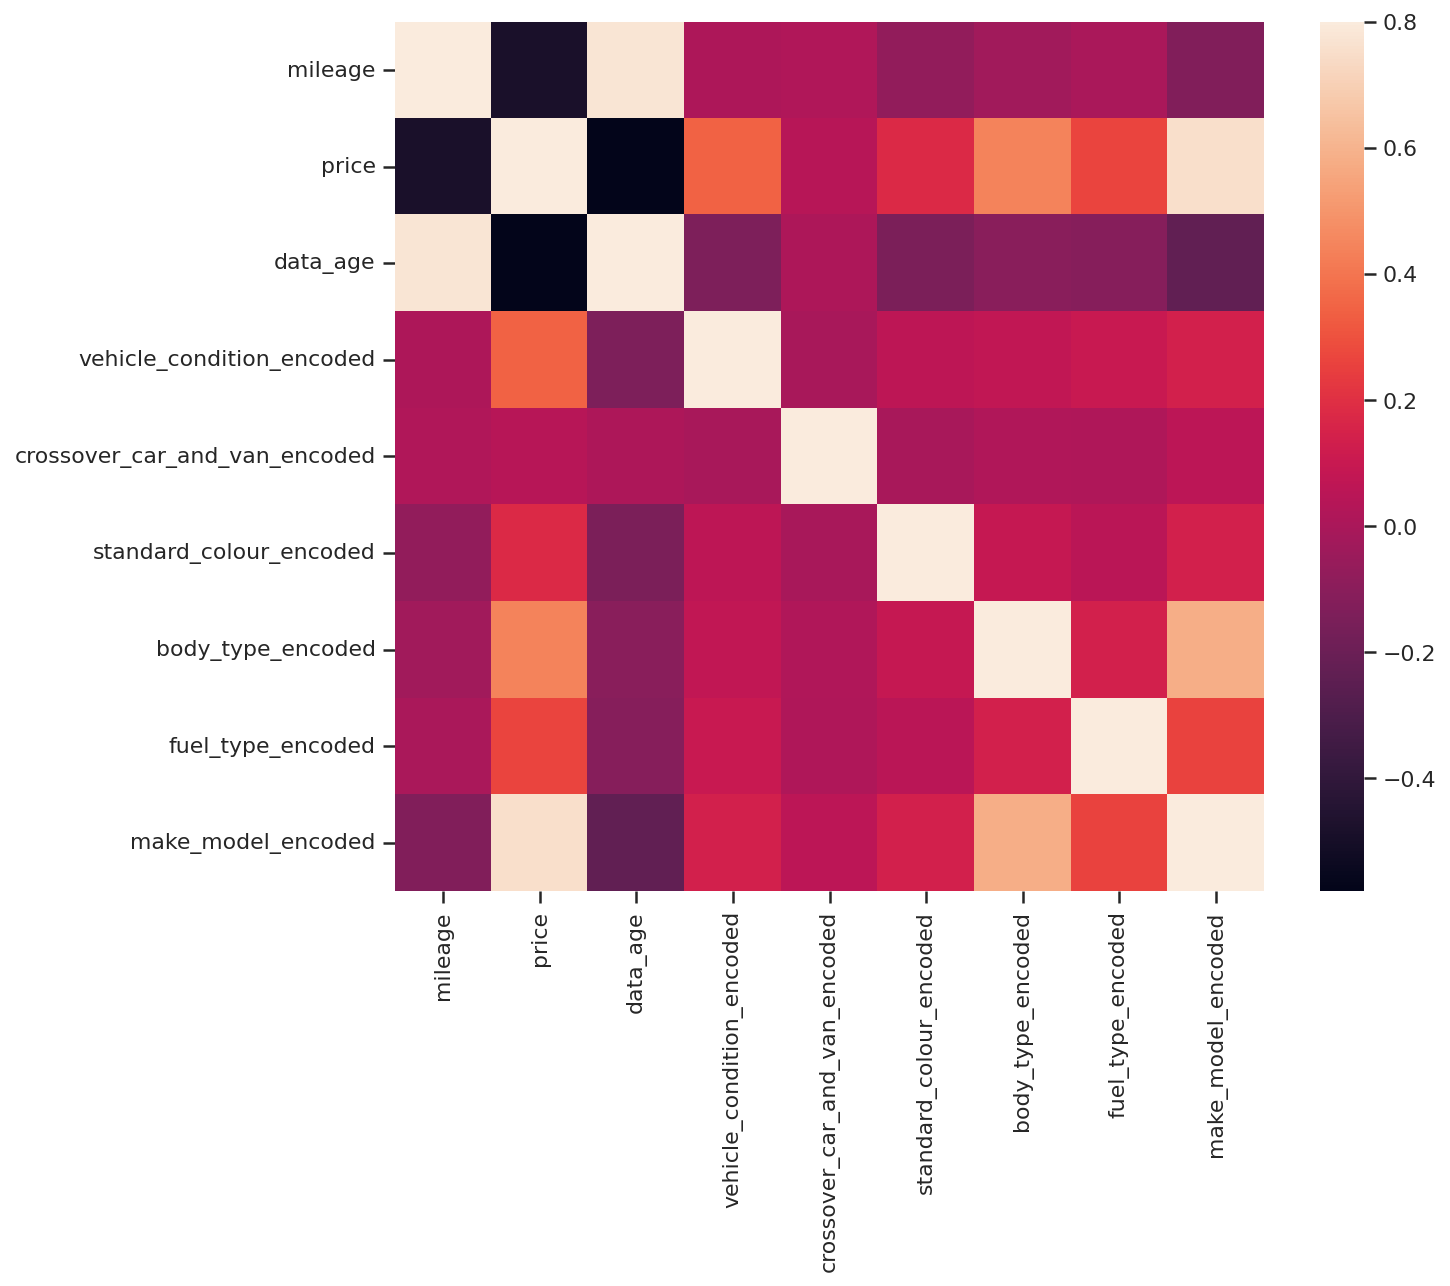

In [638]:
#correlation matrix
corrmat = trans_2_data_df.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat, vmax=.8, square=True);

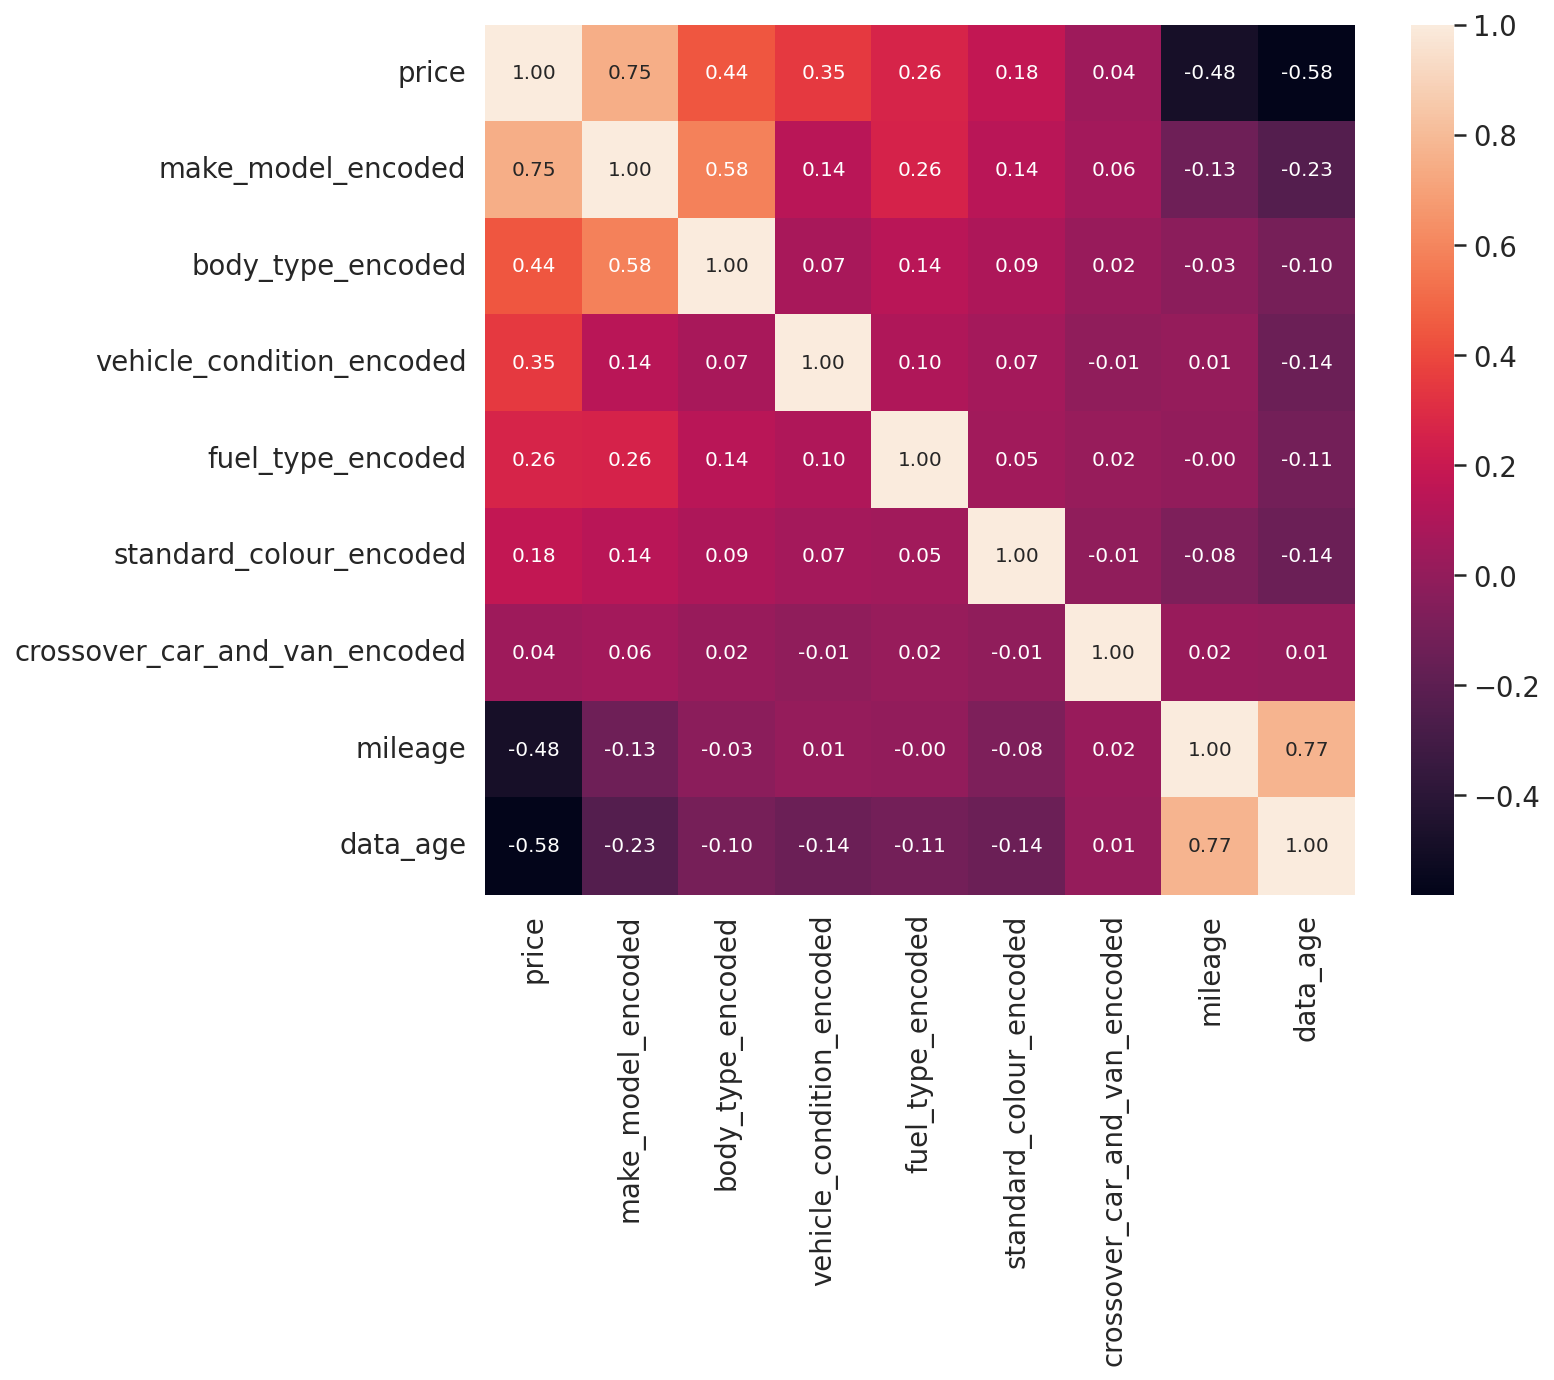

In [639]:
#Class correlation matrix
k = 9 #number of variables for heatmap

plt.figure(figsize=(10,8))
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(trans_2_data_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [640]:
trans_2_data_df_corr = trans_2_data_df.corr()

In [641]:
trans_2_data_df_corr

,mileage,price,data_age,vehicle_condition_encoded,crossover_car_and_van_encoded,standard_colour_encoded,body_type_encoded,fuel_type_encoded,make_model_encoded
mileage,1.000000,-0.484037,0.773393,0.011071,0.022381,-0.076772,-0.026930,-0.001330,-0.131560
price,-0.484037,1.000000,-0.580045,0.346176,0.042513,0.177017,0.440947,0.263788,0.752005
data_age,0.773393,-0.580045,1.000000,-0.142864,0.009670,-0.144467,-0.102038,-0.113097,-0.230185
vehicle_condition_encoded,0.011071,0.346176,-0.142864,1.000000,-0.007459,0.065059,0.074666,0.104567,0.141202
crossover_car_and_van_encoded,0.022381,0.042513,0.009670,-0.007459,1.000000,-0.006502,0.022619,0.017724,0.058889
standard_colour_encoded,-0.076772,0.177017,-0.144467,0.065059,-0.006502,1.000000,0.093690,0.051496,0.139819
body_type_encoded,-0.026930,0.440947,-0.102038,0.074666,0.022619,0.093690,1.000000,0.139828,0.580734
fuel_type_encoded,-0.001330,0.263788,-0.113097,0.104567,0.017724,0.051496,0.139828,1.000000,0.258612
make_model_encoded,-0.131560,0.752005,-0.230185,0.141202,0.058889,0.139819,0.580734,0.258612,1.000000


Let check how our features are been **correlated for Target Encoder** 
From the correlation table let take our target price agaist other features, we can deduce that mileage have a negative correlation of approximately -0.5, make_model_encoded 0.8 strong correlation, body_type_encoded 0.5 correlation, data_age_encoded -0.6, standard_colour_encoded have 0.2, vehicle_condition_encoded 0.3, crossover_car_and_van_encoded 0.04, and fuel_type 0.3 correlation. from the analyisis we can see that the make_model_encoder,              

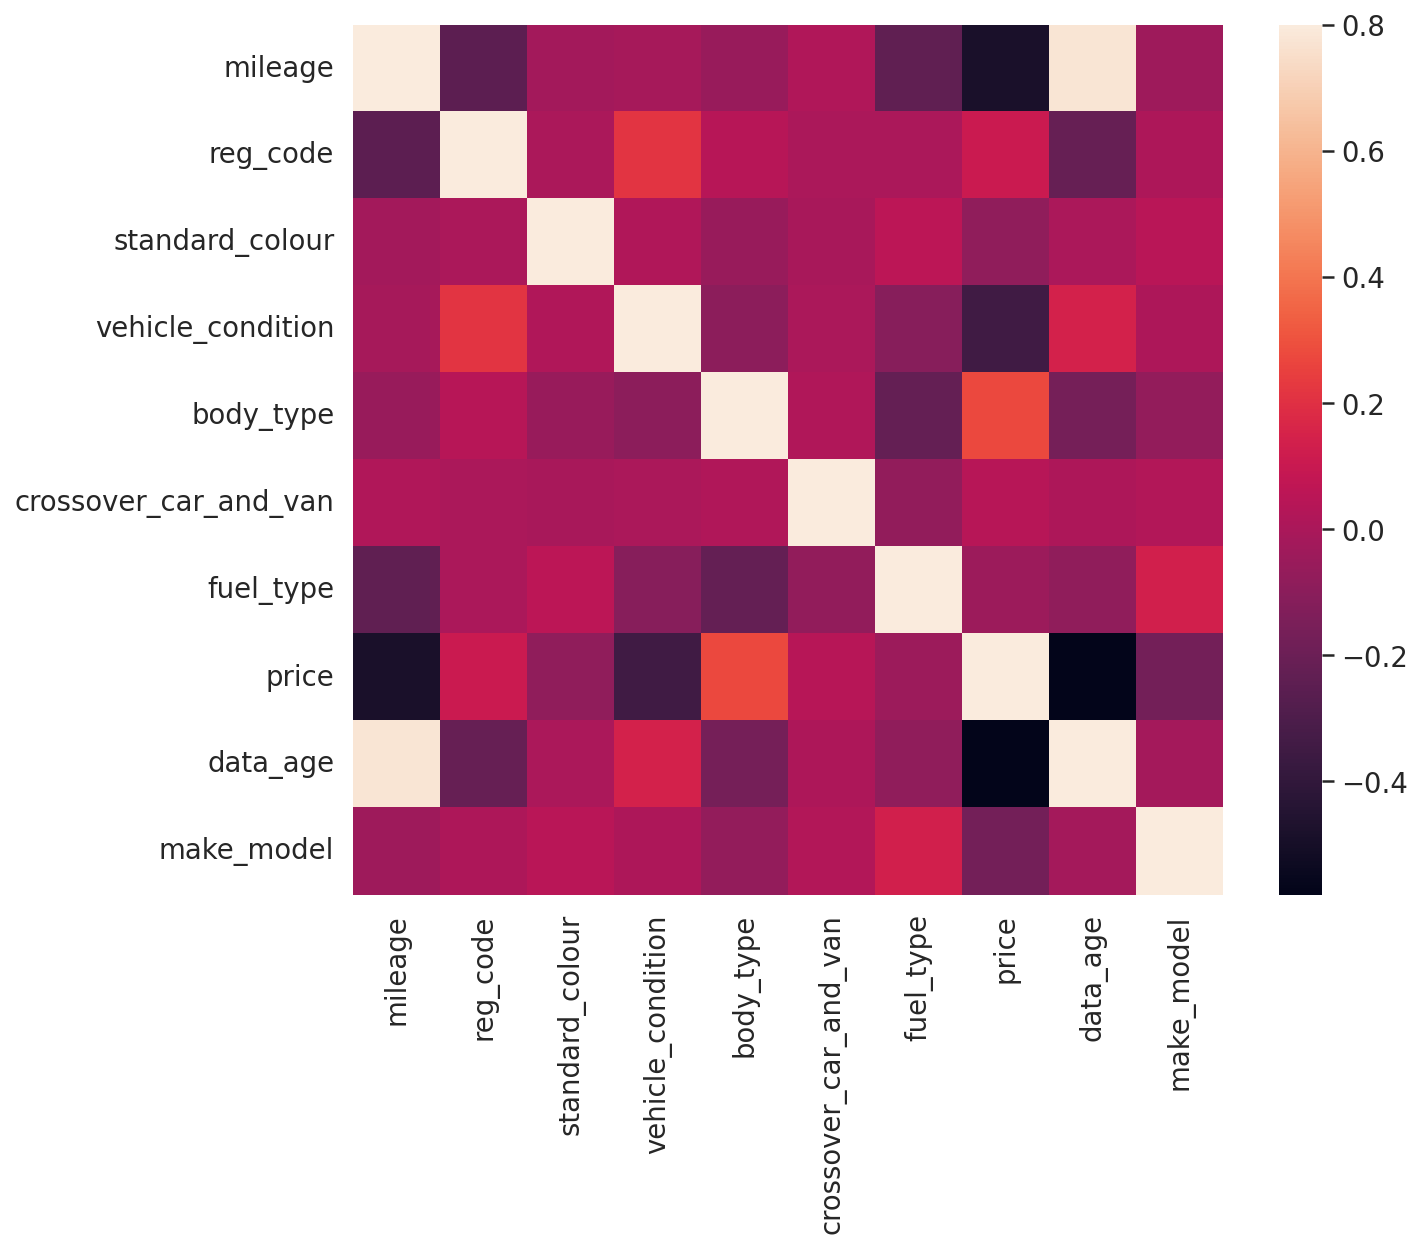

In [664]:
        #correlation matrix
corrmat = trans_data_df.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat, vmax=.8, square=True);

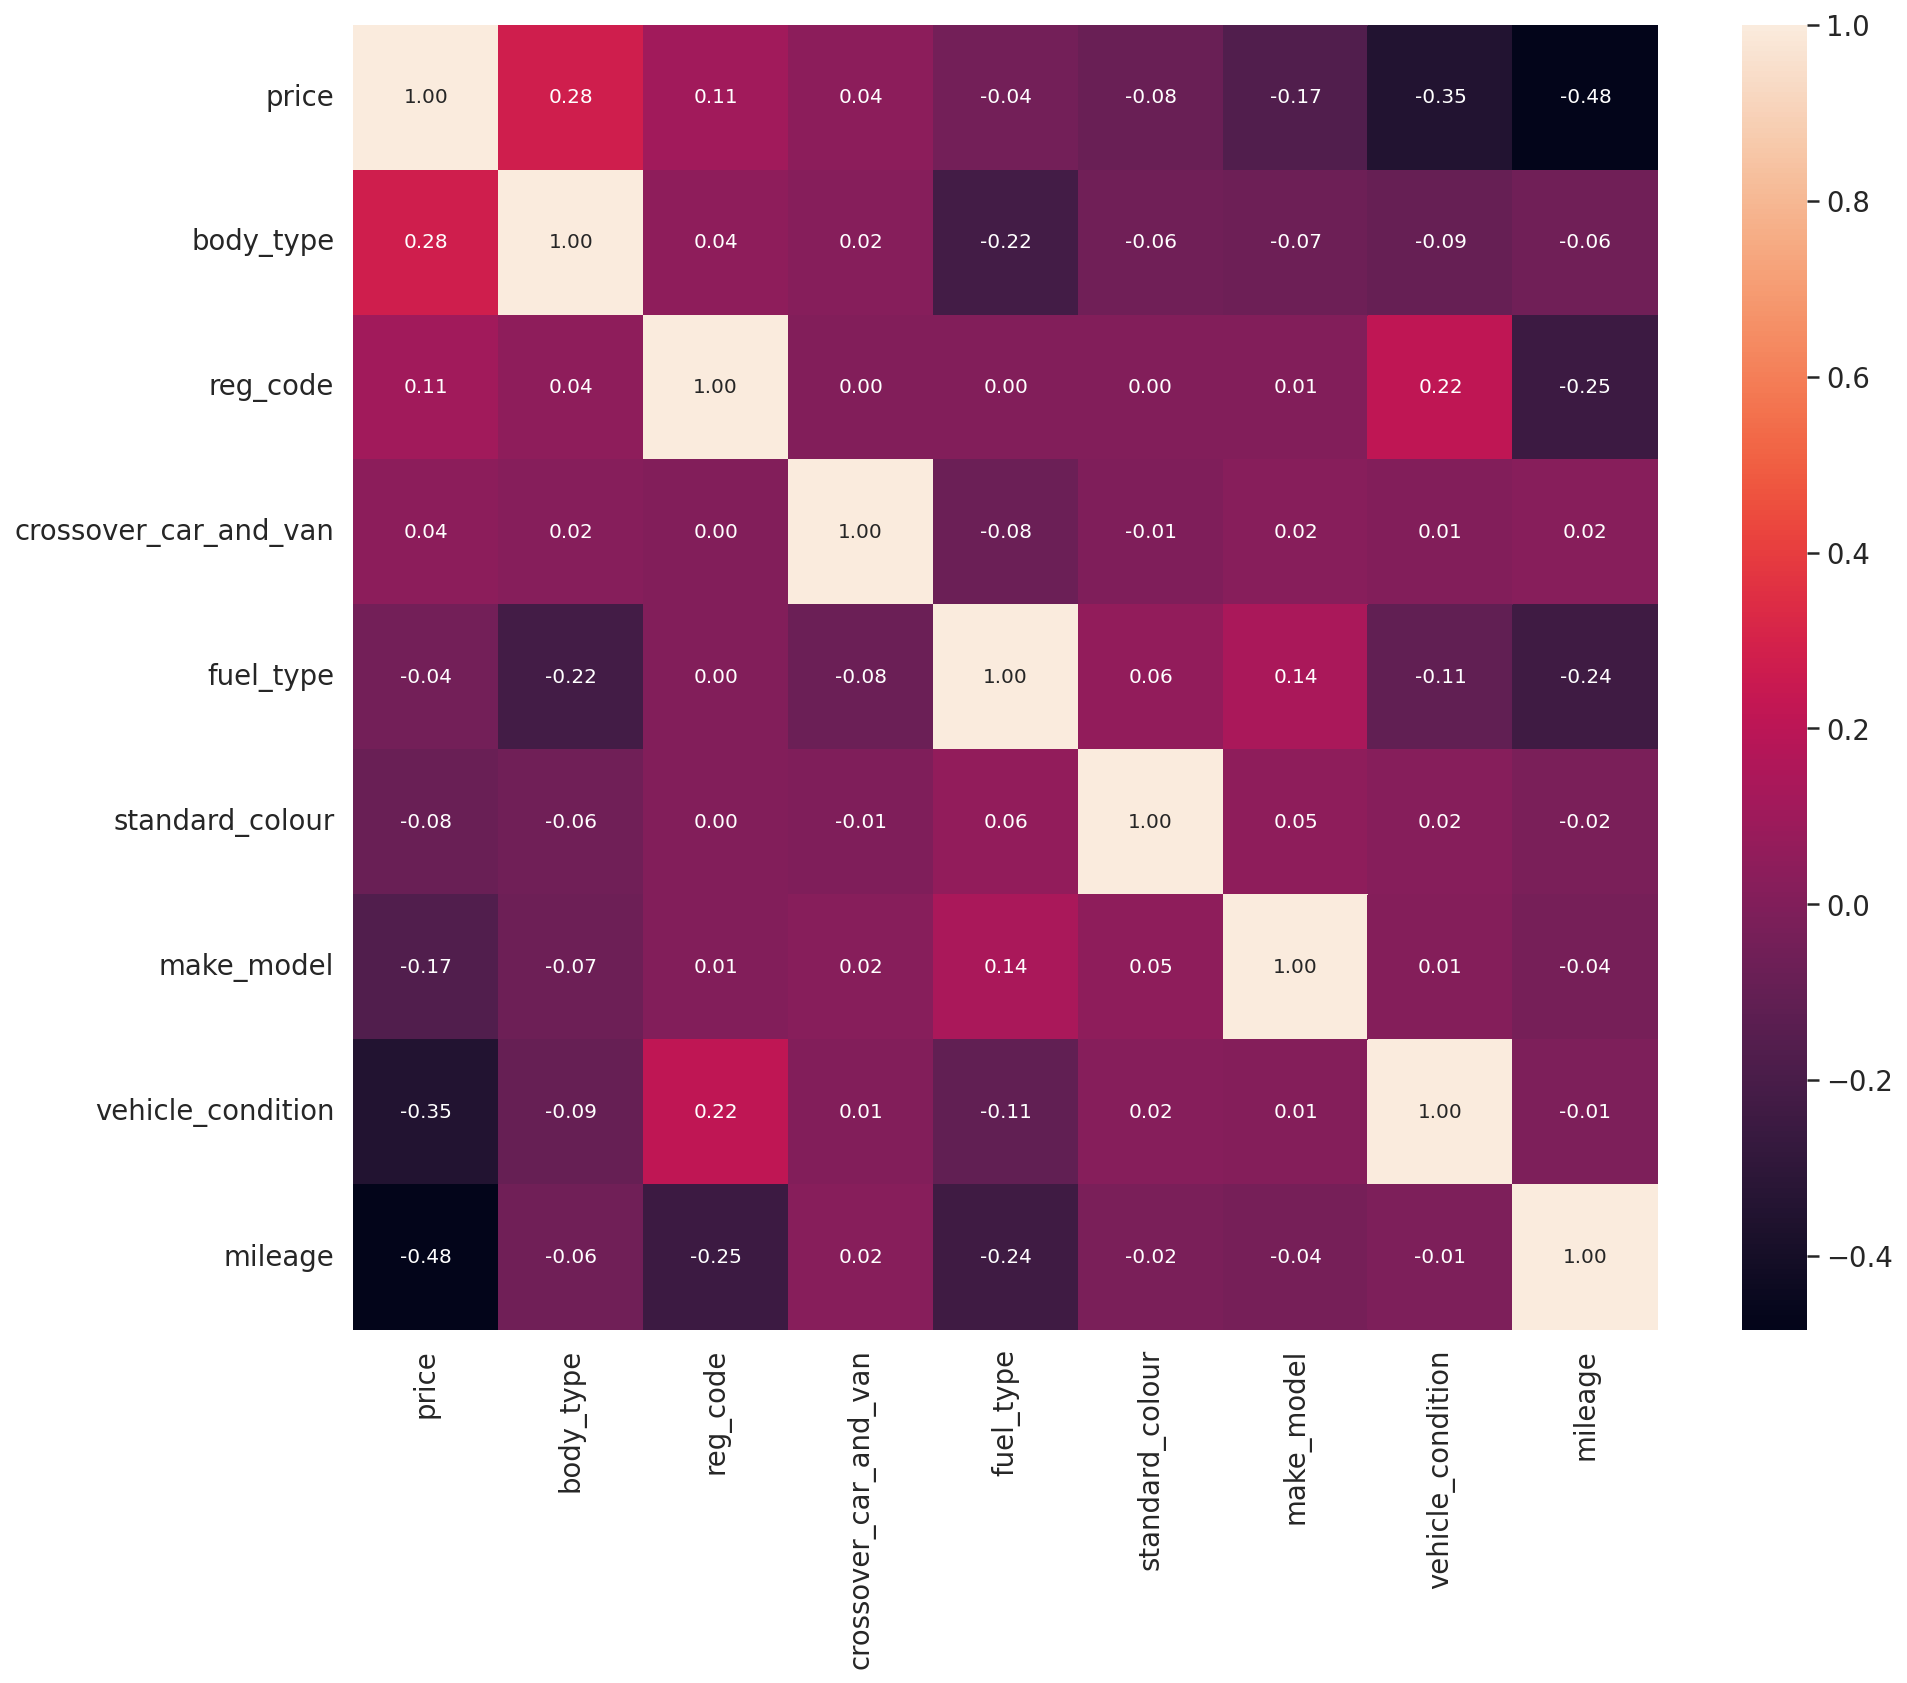

In [643]:
#Class correlation matrix
k = 9 #number of variables for heatmap

plt.figure(figsize=(15,12))
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(trans_data_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [644]:
trans_data_df_corr = trans_data_df.corr()

In [645]:
 trans_data_df_corr


,mileage,reg_code,standard_colour,vehicle_condition,body_type,crossover_car_and_van,fuel_type,price,data_age,make_model
mileage,1.000000,-0.246585,-0.023111,-0.011071,-0.055692,0.022381,-0.238865,-0.484037,0.773393,-0.036265
reg_code,-0.246585,1.000000,0.003783,0.217218,0.044299,0.004756,0.003899,0.108054,-0.216903,0.008507
standard_colour,-0.023111,0.003783,1.000000,0.019602,-0.056988,-0.005089,0.058138,-0.082344,0.005802,0.046137
vehicle_condition,-0.011071,0.217218,0.019602,1.000000,-0.091123,0.007459,-0.107367,-0.346176,0.142864,0.010621
body_type,-0.055692,0.044299,-0.056988,-0.091123,1.000000,0.019573,-0.223064,0.276976,-0.168898,-0.070528
crossover_car_and_van,0.022381,0.004756,-0.005089,0.007459,0.019573,1.000000,-0.078087,0.042513,0.009670,0.024581
fuel_type,-0.238865,0.003899,0.058138,-0.107367,-0.223064,-0.078087,1.000000,-0.043718,-0.080753,0.136721
price,-0.484037,0.108054,-0.082344,-0.346176,0.276976,0.042513,-0.043718,1.000000,-0.580045,-0.170793
data_age,0.773393,-0.216903,0.005802,0.142864,-0.168898,0.009670,-0.080753,-0.580045,1.000000,-0.018858
make_model,-0.036265,0.008507,0.046137,0.010621,-0.070528,0.024581,0.136721,-0.170793,-0.018858,1.000000


Let check how our features are been correlated for Label encoder 
From the correlation table let take our target price agaist other features, we can deduce that mileage have a negative correlation of approximately -0.5, make_model -0.2, body_type 0.3 correlation, data_aage -0.3, reg_code 0.1 correlation, standard_colour have -0.1, vehicle_condition -0.3, crossover_car_and_van 0.04, and fuel_type -0.04 correlation

outcome on Label encoder and Target encoder
Target Encoding is a technique that replaces a categorical value with the mean of the target variable for that value of the categorical variable. It is useful when the categorical variable has a natural order or ranking, such as high, medium, and low. It can help to improve the performance of a model by incorporating the relationship between the categorical variable and the target variable into the model.

Label Encoding, on the other hand, assigns a unique integer value to each category in a categorical variable. It does not take into account the relationship between the categorical variable and the target variable.

If the correlation among features are stronger in Target Encoder than Label Encoder, it may be more appropriate to use Target Encoding for the dataset as it will help to incorporate the relationship between the categorical variable and the target variable into the model.

As you can  see **Target Encoder** among features are a bit stronger than that label encoder where some feature of both encoder are the same, some are slight differnce and very few are far apart.


### 2.3.1 Data Sampling

Slicing of data by randomly selecting a subset of rows from a DataFrame.

In [646]:
#let view only the first 5 rows where data_age =10 from the dataframe
#trans_2_data_df.query("data_age == 10").head()

In [647]:
#let view only the first row where data_age =10 from the dataframe
trans_2_data_df.loc[trans_2_data_df['data_age']==10].head(1)

,mileage,reg_code,price,data_age,vehicle_condition_encoded,crossover_car_and_van_encoded,standard_colour_encoded,body_type_encoded,fuel_type_encoded,make_model_encoded



# **3. Association and Group Differences Analysis**


## 3.1 Quantitative - Quantitative


This code below is using the Seaborn library in python to create a joint plot of the data_age and mileage columns of the dataframe "trans_2_data_df" after filtering the dataframe with the query 'price' > 0 and mileage > 0'.

where the sns.jointplot() function creates a scatter plot of the two variables, with the x-axis representing data_age and the y-axis representing mileage.

The height parameter sets the size of the plot and the query is to filter out the rows where data_age and mileage are zero, it is likely to exclude any missing or null values.
The plot will show the relationship between data_age and mileage and can be useful to visualize the distribution and correlation between the variables.

In [648]:
trans_2_data_df

,mileage,reg_code,price,data_age,vehicle_condition_encoded,crossover_car_and_van_encoded,standard_colour_encoded,body_type_encoded,fuel_type_encoded,make_model_encoded
0,0.000000,17,1.000000,0.222222,0.760246,0,0.454902,0.541322,0.789046,0.827790
1,1.000000,61,0.107341,0.888889,0.351486,0,0.378505,0.470138,0.401438,0.412549
2,0.053462,17,0.357385,0.222222,0.351486,0,0.454902,0.541322,0.338185,0.235037
3,0.415717,16,0.142883,0.333333,0.351486,0,0.310648,0.235469,0.401438,0.137214
4,0.600740,64,0.821575,0.444444,0.351486,0,0.454902,0.541322,0.401438,0.812256
...,...,...,...,...,...,...,...,...,...,...
402000,0.027938,69,0.235756,0.000000,0.351486,0,0.454902,0.235469,0.338185,0.191582
402001,1.000000,59,0.000000,1.000000,0.351486,0,0.309347,0.235469,0.338185,0.001862
402002,0.491284,62,0.116271,0.777778,0.351486,0,0.396141,0.541322,0.338185,0.315306
402003,0.077320,65,0.267726,0.444444,0.351486,0,0.309347,0.235469,0.338185,0.432804


In [649]:
df = trans_2_data_df.query('mileage>0 and price>0 ')
sns.jointplot(data=df, x= 'mileage', y='price', height=15);

Output hidden; open in https://colab.research.google.com to view.

From the jointplot above we can deduce that there is a negative correlation between the price of a vehicle mileage, meaning that as the mileage of a vehicle increases, the price of the vehicle would decrease. This is because vehicles with higher mileage are generally considered to be less valuable and less desirable than vehicles with lower mileage. Therefore, it would be expected that a plot of price against mileage would show a negative correlation.

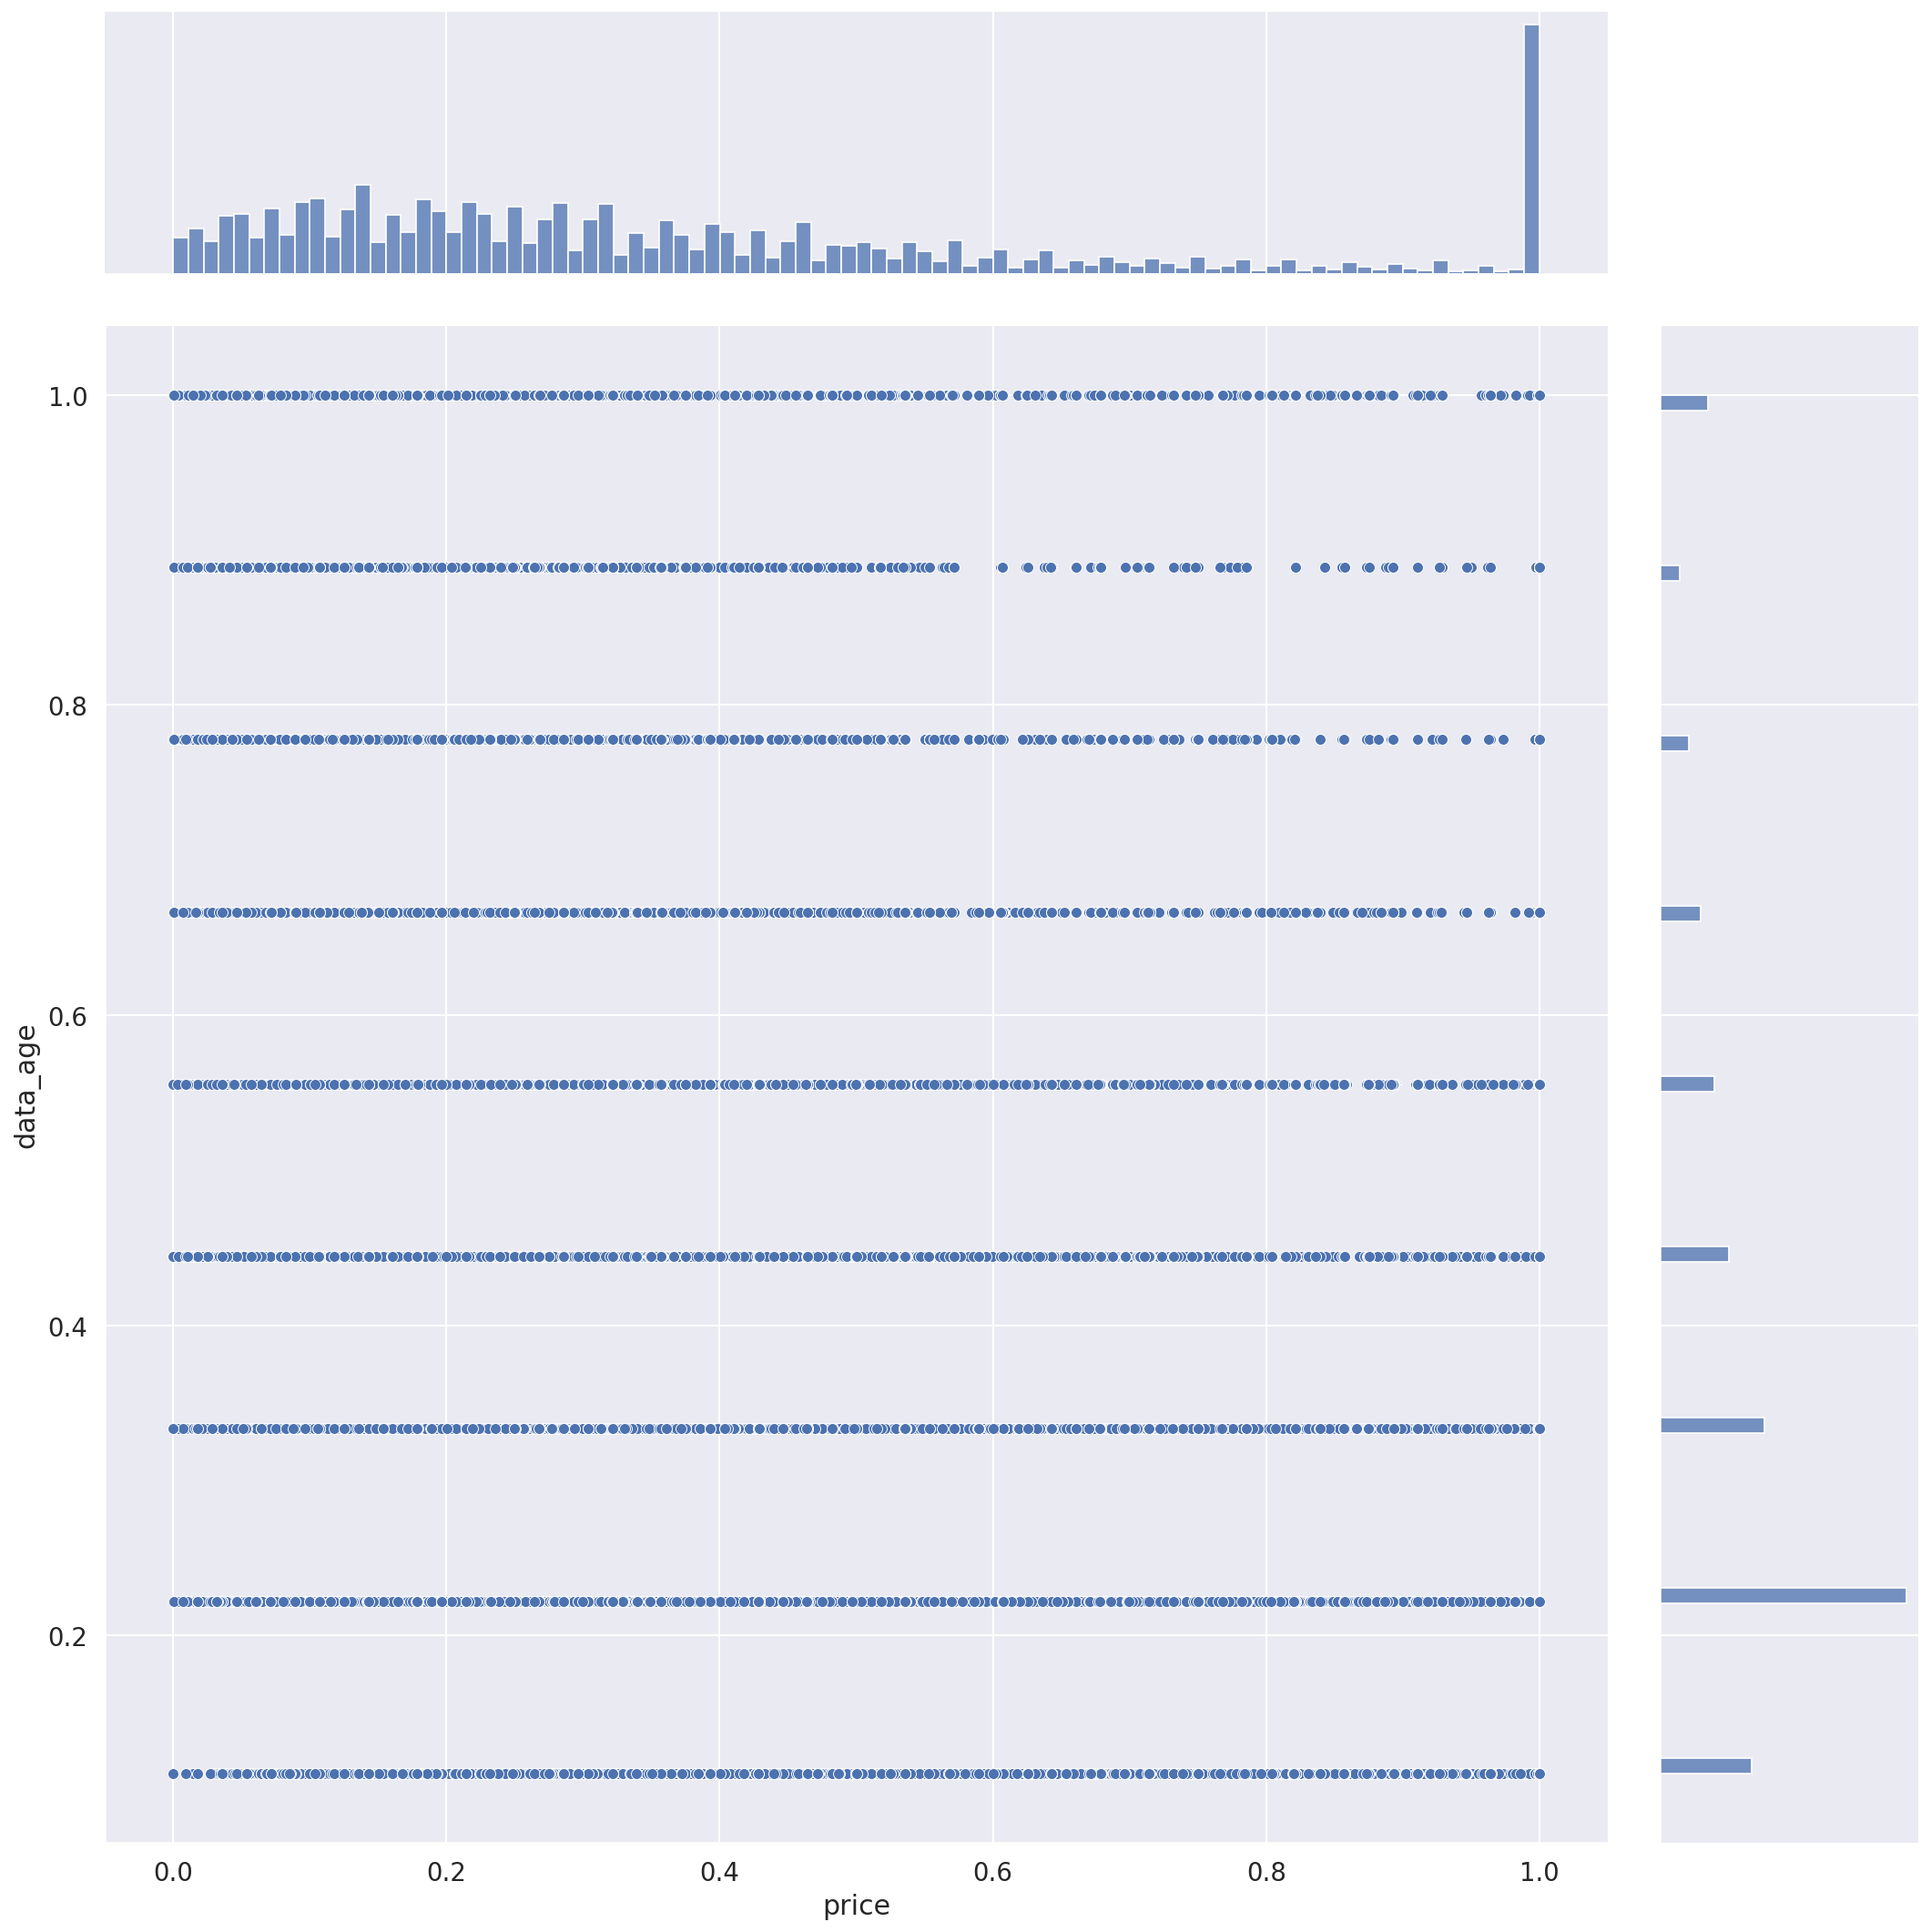

In [650]:
df = trans_2_data_df.query('price>0 and data_age>0 ')
sns.jointplot(data=df, x= 'price', y='data_age', height=15);

let set "reg" to make the chat more meaniful which indicates that the plot is showing the relationship between data_age and mileage with a regression line (scatter plot) of the data points for data_age and mileage, as well as a line that represents the linear relationship between the two variables. The line will be created using a linear regression model.

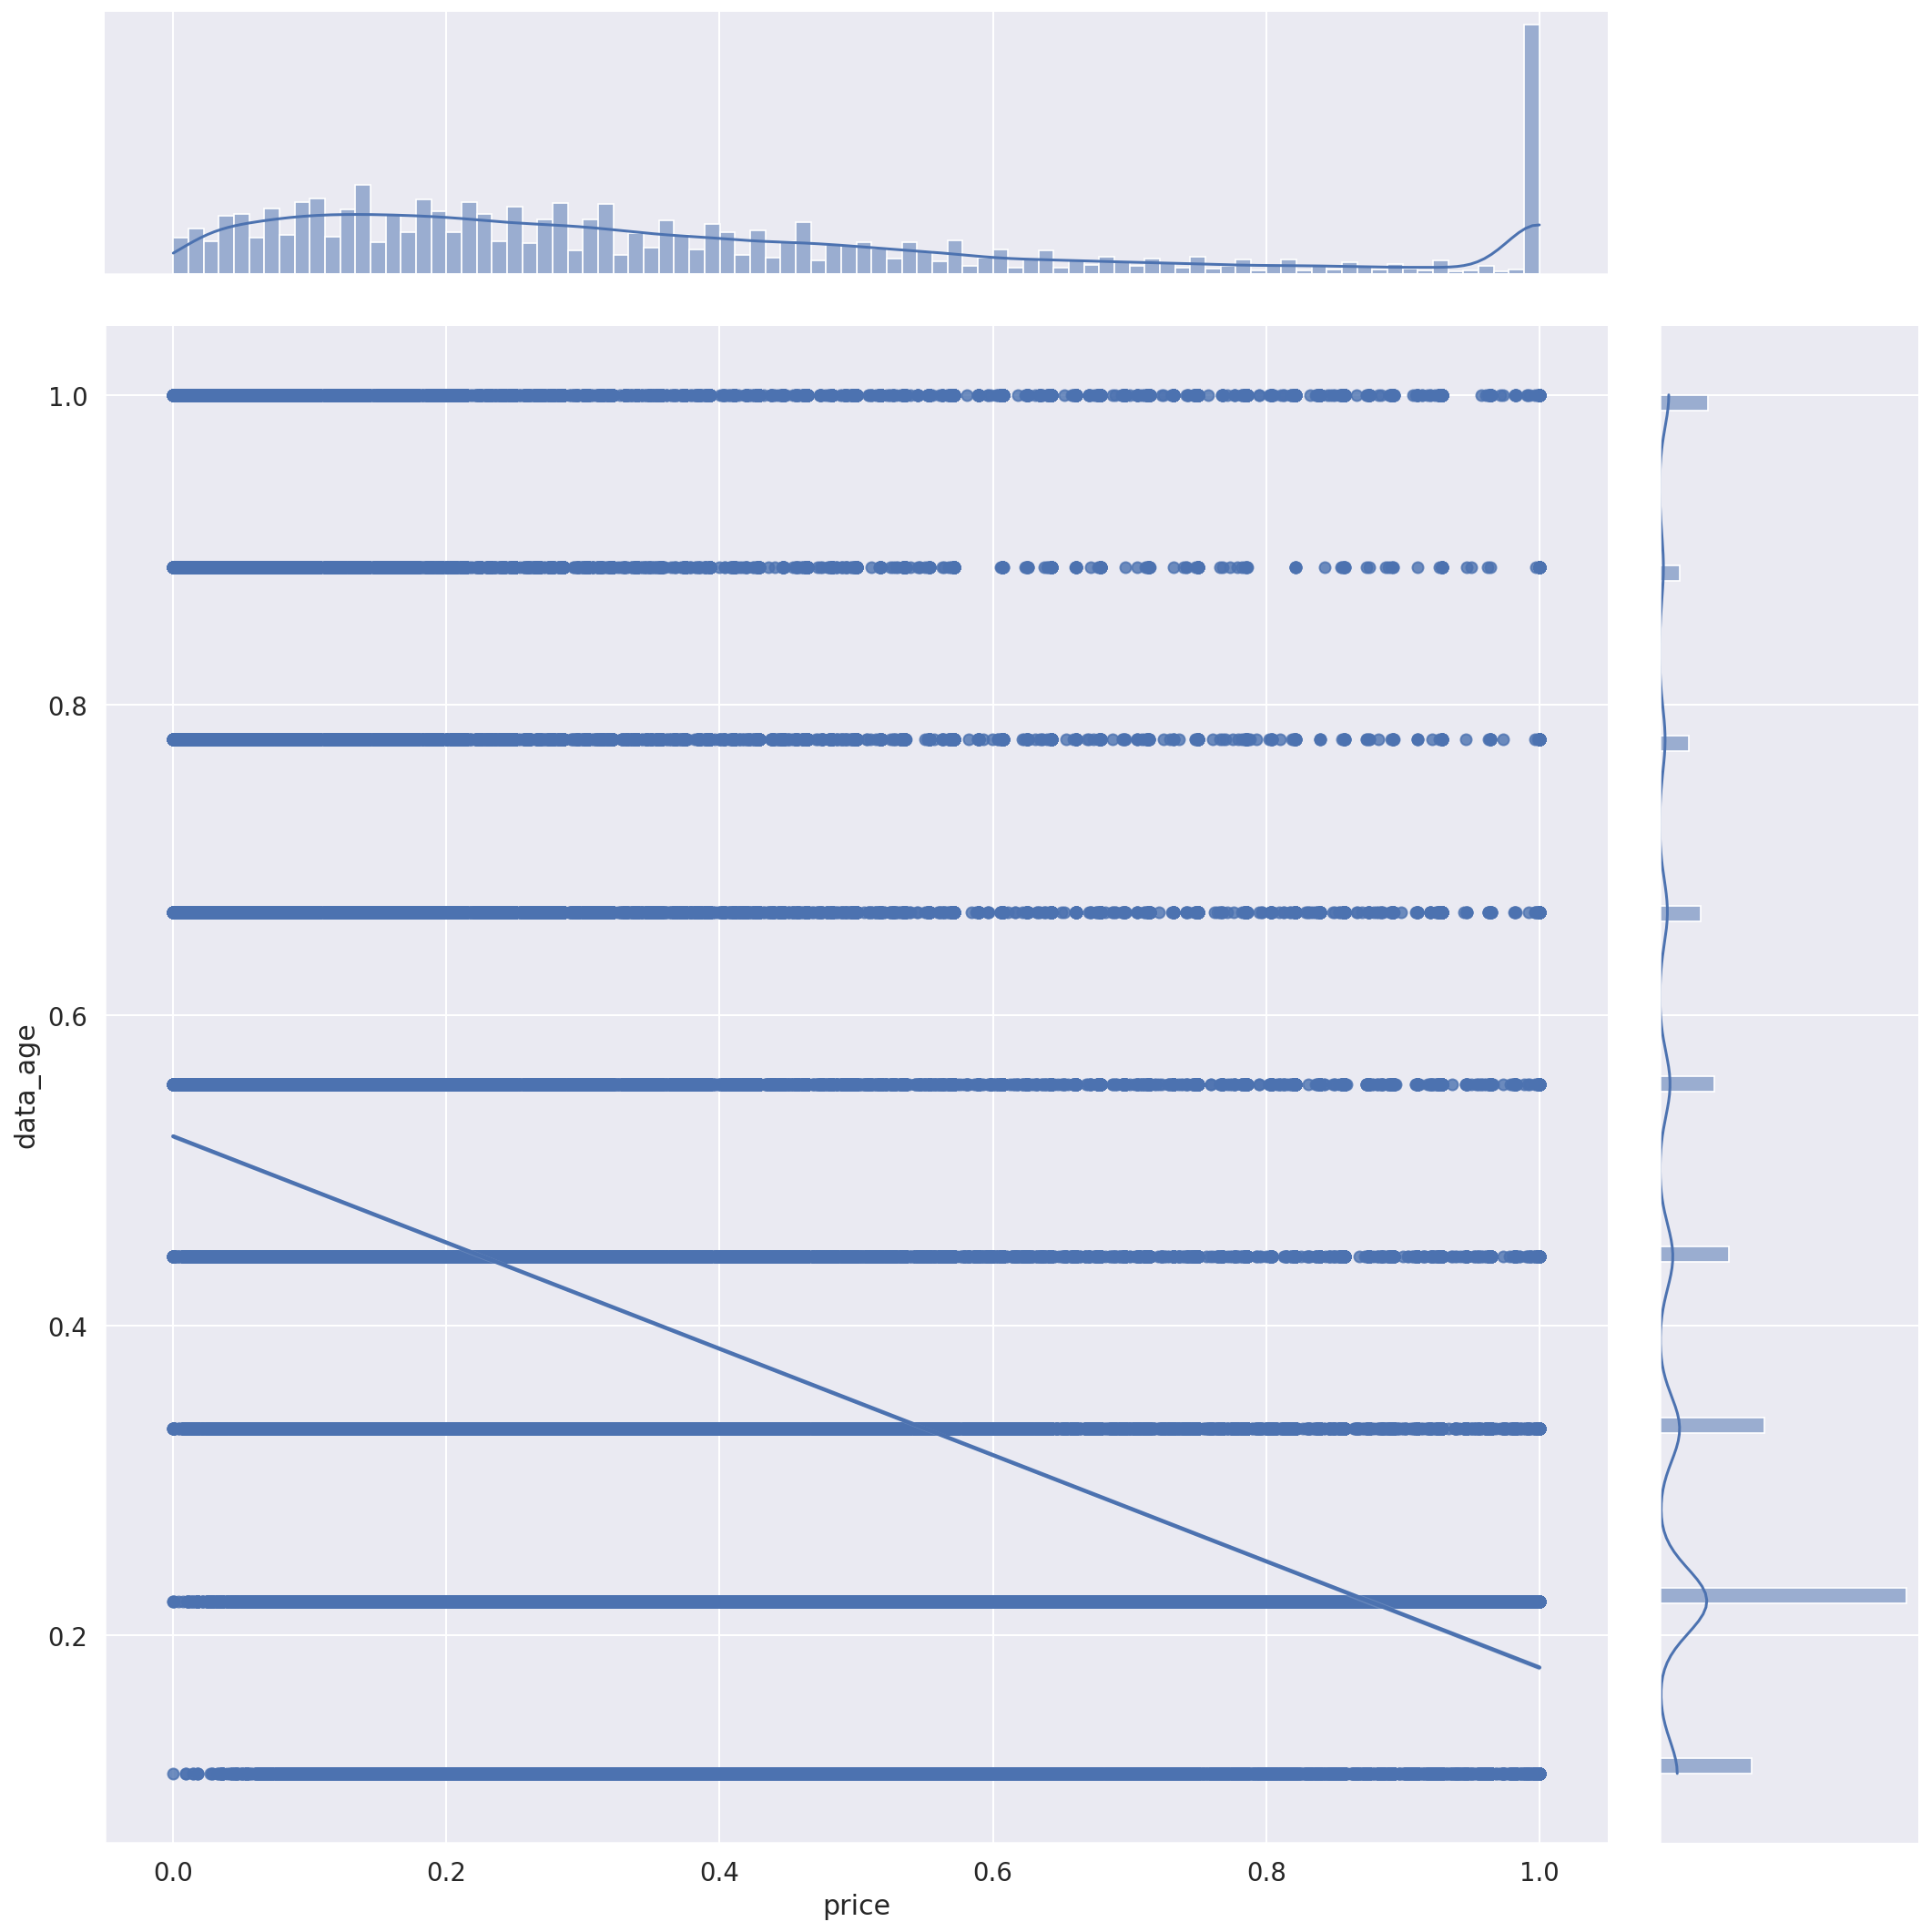

From the jointplot above we can deduce that there is also a negative correlation between the price of a vehicle age named data_age, that as the age of car increases, the price of the vehicle would decrease.This is because vehicles with older age are generally considered to be less valuable and less desirable than newer vehicles. Therefore, it would be expected that a plot of price against age would show a negative correlation. that is the higher the price the lesser the data_age.





 


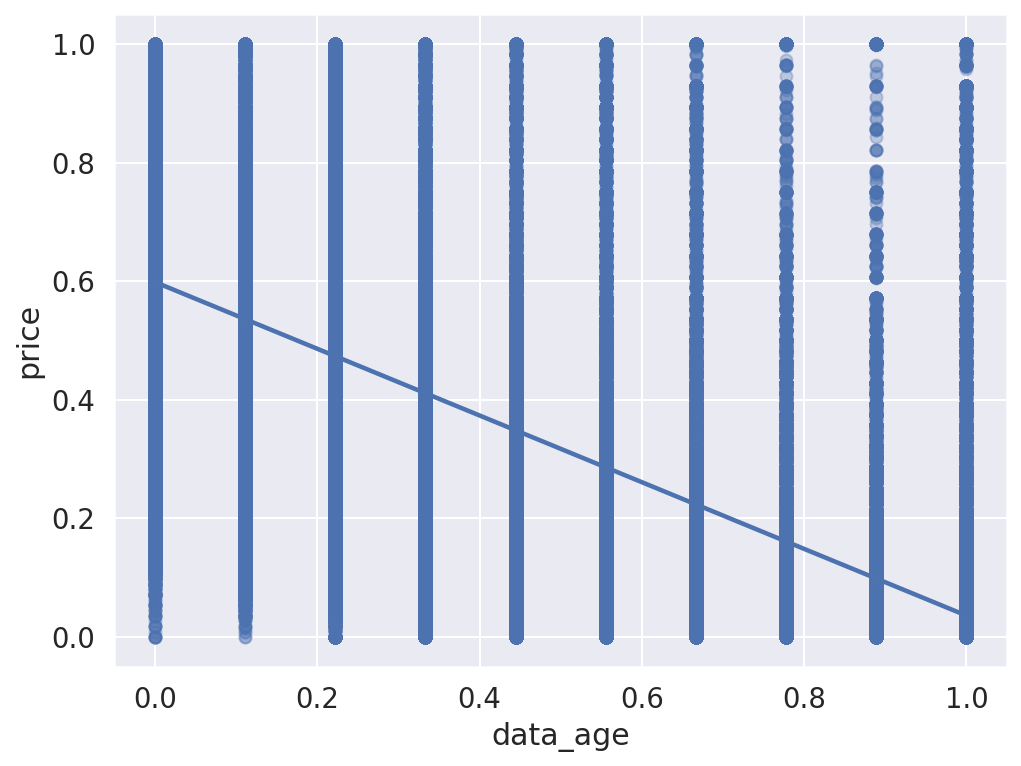

In [652]:
sns.regplot(data=trans_2_data_df, x='data_age', y='price', scatter_kws=dict(alpha=0.3));

price agaist data_age is negative correlated 

## 3.2 Quantitative - Categorical


In [653]:
trans_2_data_df.head(1)

,mileage,reg_code,price,data_age,vehicle_condition_encoded,crossover_car_and_van_encoded,standard_colour_encoded,body_type_encoded,fuel_type_encoded,make_model_encoded
0,0.0,17,1.0,0.222222,0.760246,0,0.454902,0.541322,0.789046,0.82779


There is a negative correlation between the price and data age, been negative

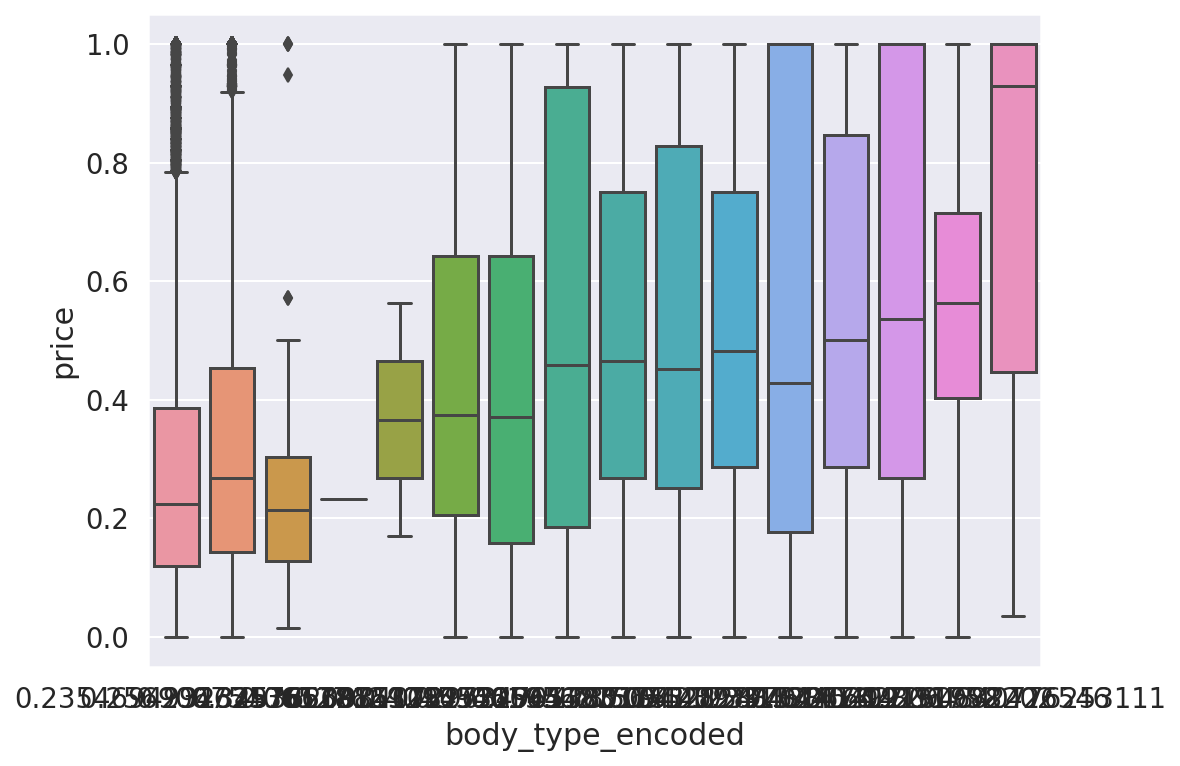

In [655]:
sns.boxplot(x='body_type_encoded', y='price', data=trans_2_data_df.loc[trans_2_data_df['price']>0]);

There is moderate positive correlation between car price with different body type of a car. which means that as car body type changes, car price is likely to change in the same direction (i.e body type and price are positively associated). 




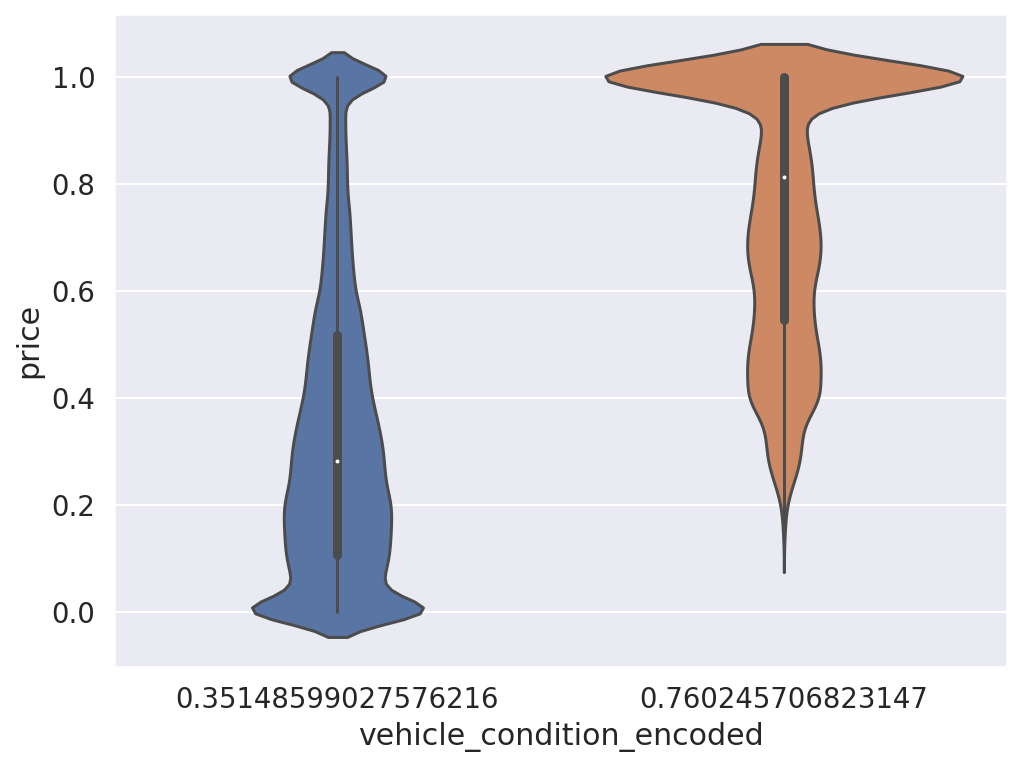

In [656]:
sns.violinplot(x='vehicle_condition_encoded', y='price', data=trans_2_data_df);

There is a weak positive correlation between car price and car vehicle condition. This means that as car vehicle condition changes, car price is likely to change in the same direction (i.e., car vehicle condition and price are positively associated), but the correlation is not strong. It means the change in car vehicle condition has a weak impact on the car price.





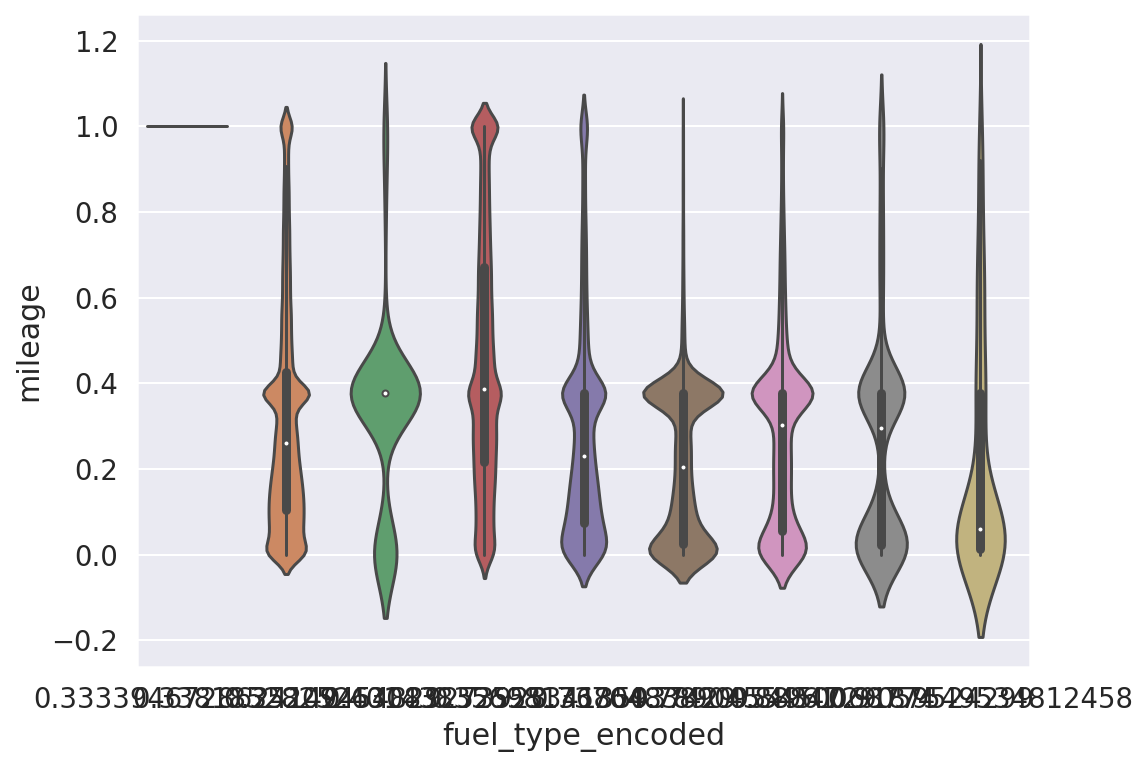

In [657]:
sns.violinplot(x='fuel_type_encoded', y='mileage', data=trans_2_data_df);

The fuel influence the mileage even though they

## 3.3 Categorical - Categorical


In [658]:
crossover_car_and_van_encoded_bands = pd.cut(
    trans_2_data_df['crossover_car_and_van_encoded'],
    bins=[0, 30, 100],
    labels=['NEW', 'USED'],
    right=False,
    include_lowest=True
)

trans_data_cat_df = (
    trans_2_data_df.assign(
        crossover_car_and_van_encoded_cat=crossover_car_and_van_encoded_bands
    )
)

In [659]:
trans_2_data_df.head(1)

,mileage,reg_code,price,data_age,vehicle_condition_encoded,crossover_car_and_van_encoded,standard_colour_encoded,body_type_encoded,fuel_type_encoded,make_model_encoded
0,0.0,17,1.0,0.222222,0.760246,0,0.454902,0.541322,0.789046,0.82779


In [660]:
trans_2_data_df.groupby(by=['fuel_type_encoded', 'crossover_car_and_van_encoded']).size().unstack()

crossover_car_and_van_encoded,0,1
fuel_type_encoded,,
0.333395,NaN,1.0
0.338185,217503.0,27.0
0.352095,221.0,NaN
0.401438,156378.0,1742.0
0.525553,13602.0,NaN
0.737648,4765.0,18.0
0.789046,6153.0,7.0
0.888473,1403.0,NaN
0.918755,185.0,NaN


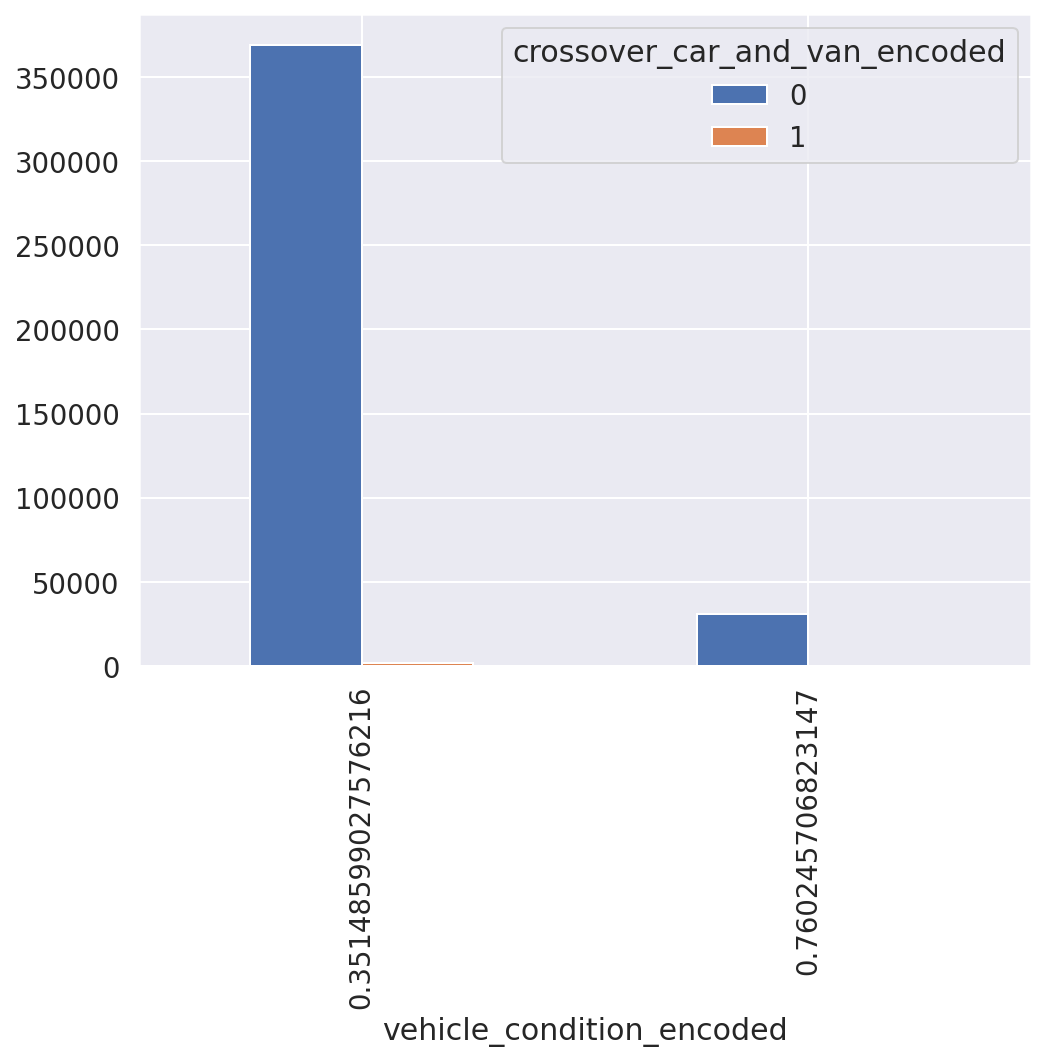

In [661]:
trans_2_data_df.groupby(by=['vehicle_condition_encoded' ,'crossover_car_and_van_encoded']).size().unstack().plot.bar();







we can see that in vehicle_condition_encoded the merging of used cars and new cars are far apart,There is little association between the new and used  variables. It means that the crossover car and van are not strongly correlated.
Since used cars is directly proportional to mileage of a cars. and the the age of that car.

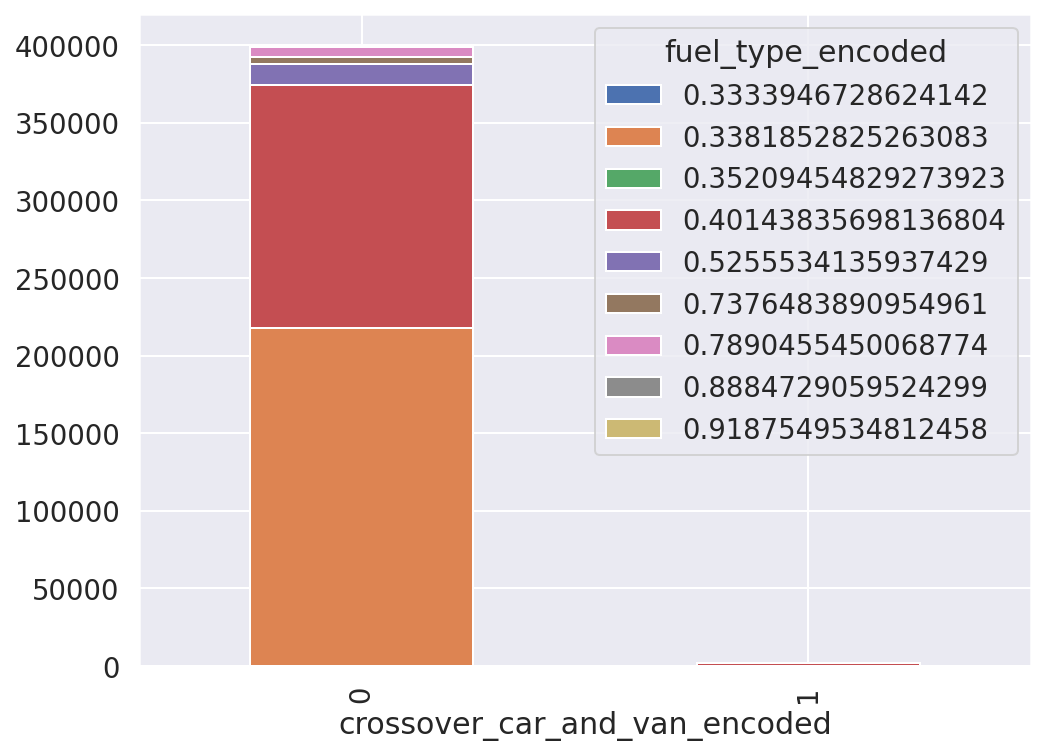

In [662]:
trans_2_data_df.groupby(by=['crossover_car_and_van_encoded', 'fuel_type_encoded']).size().unstack().plot.bar(stacked=True);

There is very low correlation between the fuel types and the crossover_car_van 